## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [1]:
#core
import numpy as np
import pandas as pd

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

#splitting data
from sklearn.model_selection import train_test_split

#model building
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn import tree

#grid search
from sklearn.model_selection import GridSearchCV

#to get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
)

## Loading the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Python Course/Loan_Modelling.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


There appear to be no null values in the dataset.

## Data Overview

In [4]:
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


The average customer age is 45 years. The minimum and maximum ages are 23 and 67 respectively.

The average income is \$74,000. The minimum and maximum are \$8,000 and \$224,000 respectively.

The average spending on a credit card per month is just around \$2,000. the min and max are \$0 and the max is \$10,000 respectively.

The average mortage amount is \$56,000. the min and max are \$0 and \$635,000 respectively.


In [6]:
#checking for duplicate values
df.duplicated().sum()

np.int64(0)

No values re duplicated in this dataset.

In [7]:
df['Personal_Loan'].value_counts()

,count
Personal_Loan,
0,4520
1,480


In [8]:
#finding the percentage of customers who have taken a loan
loan_counts = df['Personal_Loan'].value_counts()
loan = loan_counts[1]
print('this many people have a loan with the bank',loan)

total_personal_loan = df['Personal_Loan'].count()
print('this many people are customers of the bank', total_personal_loan)

percent_loan = (loan / total_personal_loan) * 100

print(percent_loan, '% of customers have personal loans.')


this many people have a loan with the bank 480
this many people are customers of the bank 5000
9.6 % of customers have personal loans.


It seems that only 9.6% of customers have personal loans with the bank at this time.

In [9]:
#i want to check the unique values of columns of interest to me
cols_of_interest = ['Experience','Education', 'Family']

for col in cols_of_interest:
  print(col)
  print(df[col].unique())
  print('')

Experience
[ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 -1 34  0 38 40 33  4 -2 42 -3 43]

Education
[1 2 3]

Family
[4 3 1 2]



In [10]:
df[df['Experience'] <0]

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


In [11]:
df[df['Experience'] <0].count()

,0
ID,52
Age,52
Experience,52
Income,52
ZIPCode,52
Family,52
CCAvg,52
Education,52
Mortgage,52
Personal_Loan,52


There are 52 experience values that are negative.

Looking at the table above (df of all negative experience values), it's obvious that these negative experience years range from -1 to -3.

I can simply remove the negative sign on these values. This will work because it seems that everyone with negative experience is in their 20s and it is reasonable to assume that those in their 20s would have 1-3 years of work experience. It's likely that these mistakes are just entry errors.

In [12]:
#Let's go with option 1
df['Experience'] = df['Experience'].abs()

In [13]:
#let's check if that removed the negative values
df['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, 34,  0, 38, 40, 33,  4, 42, 43])

Awesome, all the negative values have been replaced with positives.

* Observations:
  * Key Observation: Only around 9% of customers have a loan with the bank.
  * The average income is \$74,000. The minimum and maximum are \$8,000 and \$224,000 respectively.
  * The average spending on a credit card per month is just around \$2,000. the min and max are \$0 and the max is \$10,000 respectively.
* Sanity checks:
  * No null values.
  * No duplicates.
  * There were 52 negative values in the data. I've removed the negative signs on all of these.

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

###Univariate Analysis

In [14]:
#it willhelp my analysis, and future model building, to convert categorical variables from numeric.
cat_cols = [
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
    "ZIPCode",
]
df[cat_cols] = df[cat_cols].astype("category")

In [15]:
#I will define the num_cols so that I can use this in univariate and multivariate analysis
num_cols = [
    "Age",
    "Experience",
    "Income",
    "Family",
    "CCAvg",
    "Mortgage"
]

In [16]:
#checking the dtype of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIPCode             5000 non-null   category
 5   Family              5000 non-null   int64   
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   category
 8   Mortgage            5000 non-null   int64   
 9   Personal_Loan       5000 non-null   category
 10  Securities_Account  5000 non-null   category
 11  CD_Account          5000 non-null   category
 12  Online              5000 non-null   category
 13  CreditCard          5000 non-null   category
dtypes: category(7), float64(1), int64(6)
memory usage: 333.2 KB


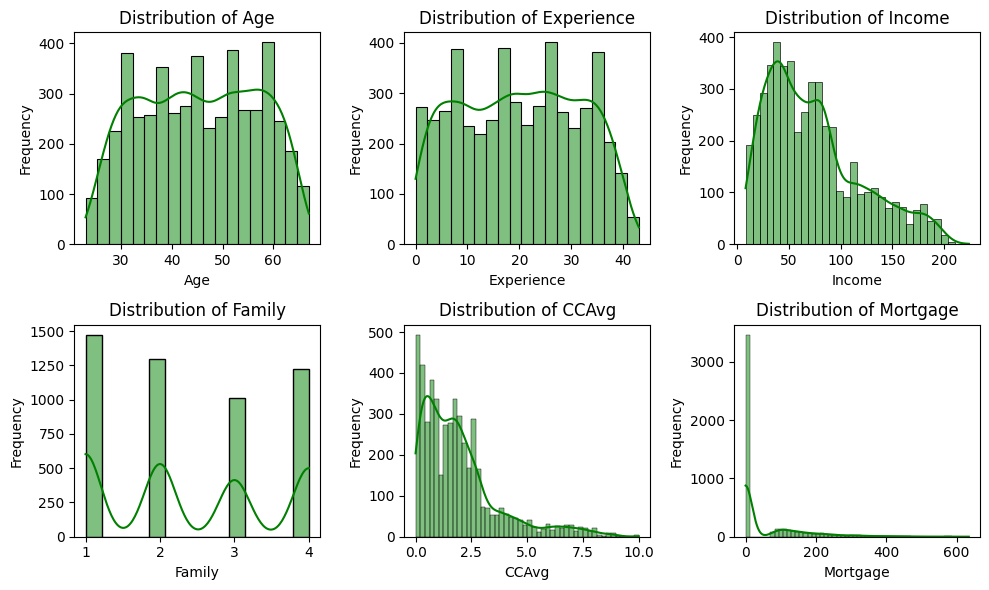

In [17]:
#creating histplots of every column
plt.figure(figsize=(10,6))

for i, feature in enumerate(num_cols):
  plt.subplot(2,3,i+1)
  sns.histplot(data=df, x=feature, kde=True, color='green');
  plt.title(f'Distribution of {feature}')
  plt.xlabel(feature)
  plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Upon first glance at the distibutions:

Features like Age, Experience, Family, and Education are pretty uniformly distributed.

Features like Income, CC Average, and Mortgage have a strong right-skewed distribution.

It seems that majority of customers do not pay Mortgage, which is why Mortgage has such a strong right skew. It almost seems that anyone who does pay mortgage is an outlier in the data.

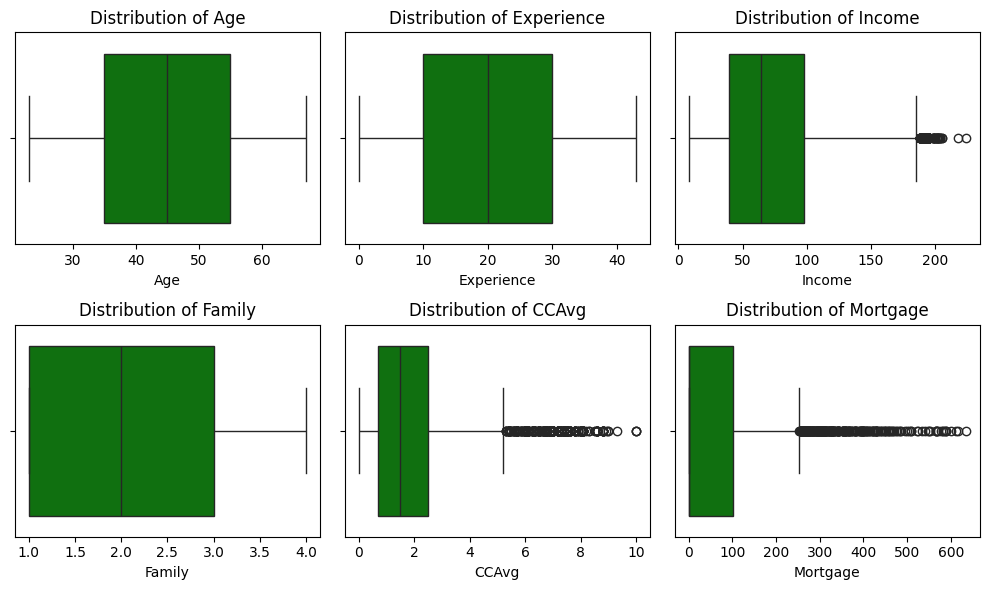

In [18]:
# creating boxplots of every column
plt.figure(figsize=(10,6))

for i, feature in enumerate(num_cols):
  plt.subplot(2,3,i+1)
  sns.boxplot(data=df, x=feature, color='green');
  plt.title(f'Distribution of {feature}')
  plt.xlabel(feature)

plt.tight_layout()
plt.show()

The boxplots seem to confirm the findings of the histograms.

It's also clear that features like Income, CC Avg, and Mortgage have quite a few outliers.

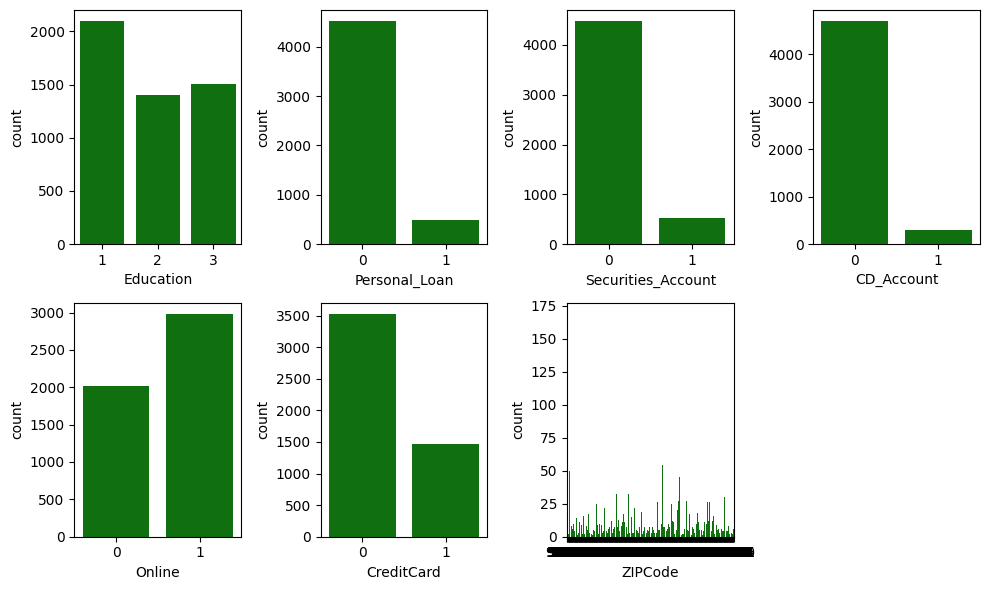

In [19]:
#now i'll create countplots for all of the categorical features in the data
plt.figure(figsize=(10,6))

for i, feature in enumerate(cat_cols):
  plt.subplot(2,4,i+1)
  sns.countplot(x = feature, data=df, color='green');
  plt.xlabel(feature)

plt.tight_layout()
plt.show()

For the categorical features.
* Majority of customers lack a Personal Loan, Securities Account, CD Account, and Credit Card.
* Well over half of the customers of the bank have an online account.
* Most customers have a undergrad degree. An almost equal number have a master's and or advanced/professional.

In [20]:
#I'm curious how many customers have credit cards in total
card = df[df['CCAvg'] > 0].value_counts().sum()
print(card, 'customers have credit cards.')

#Im curious how many customers have credit cards from All Life
diff_card = df[df['CreditCard'] == 1].value_counts().sum()
print(card - diff_card, 'customers have credit cards from All Life.')


4894 customers have credit cards.
3424 customers have credit cards from All Life.


So, in total, 4894 customers have credit cards.
3424 customers have credit cards from All Life.

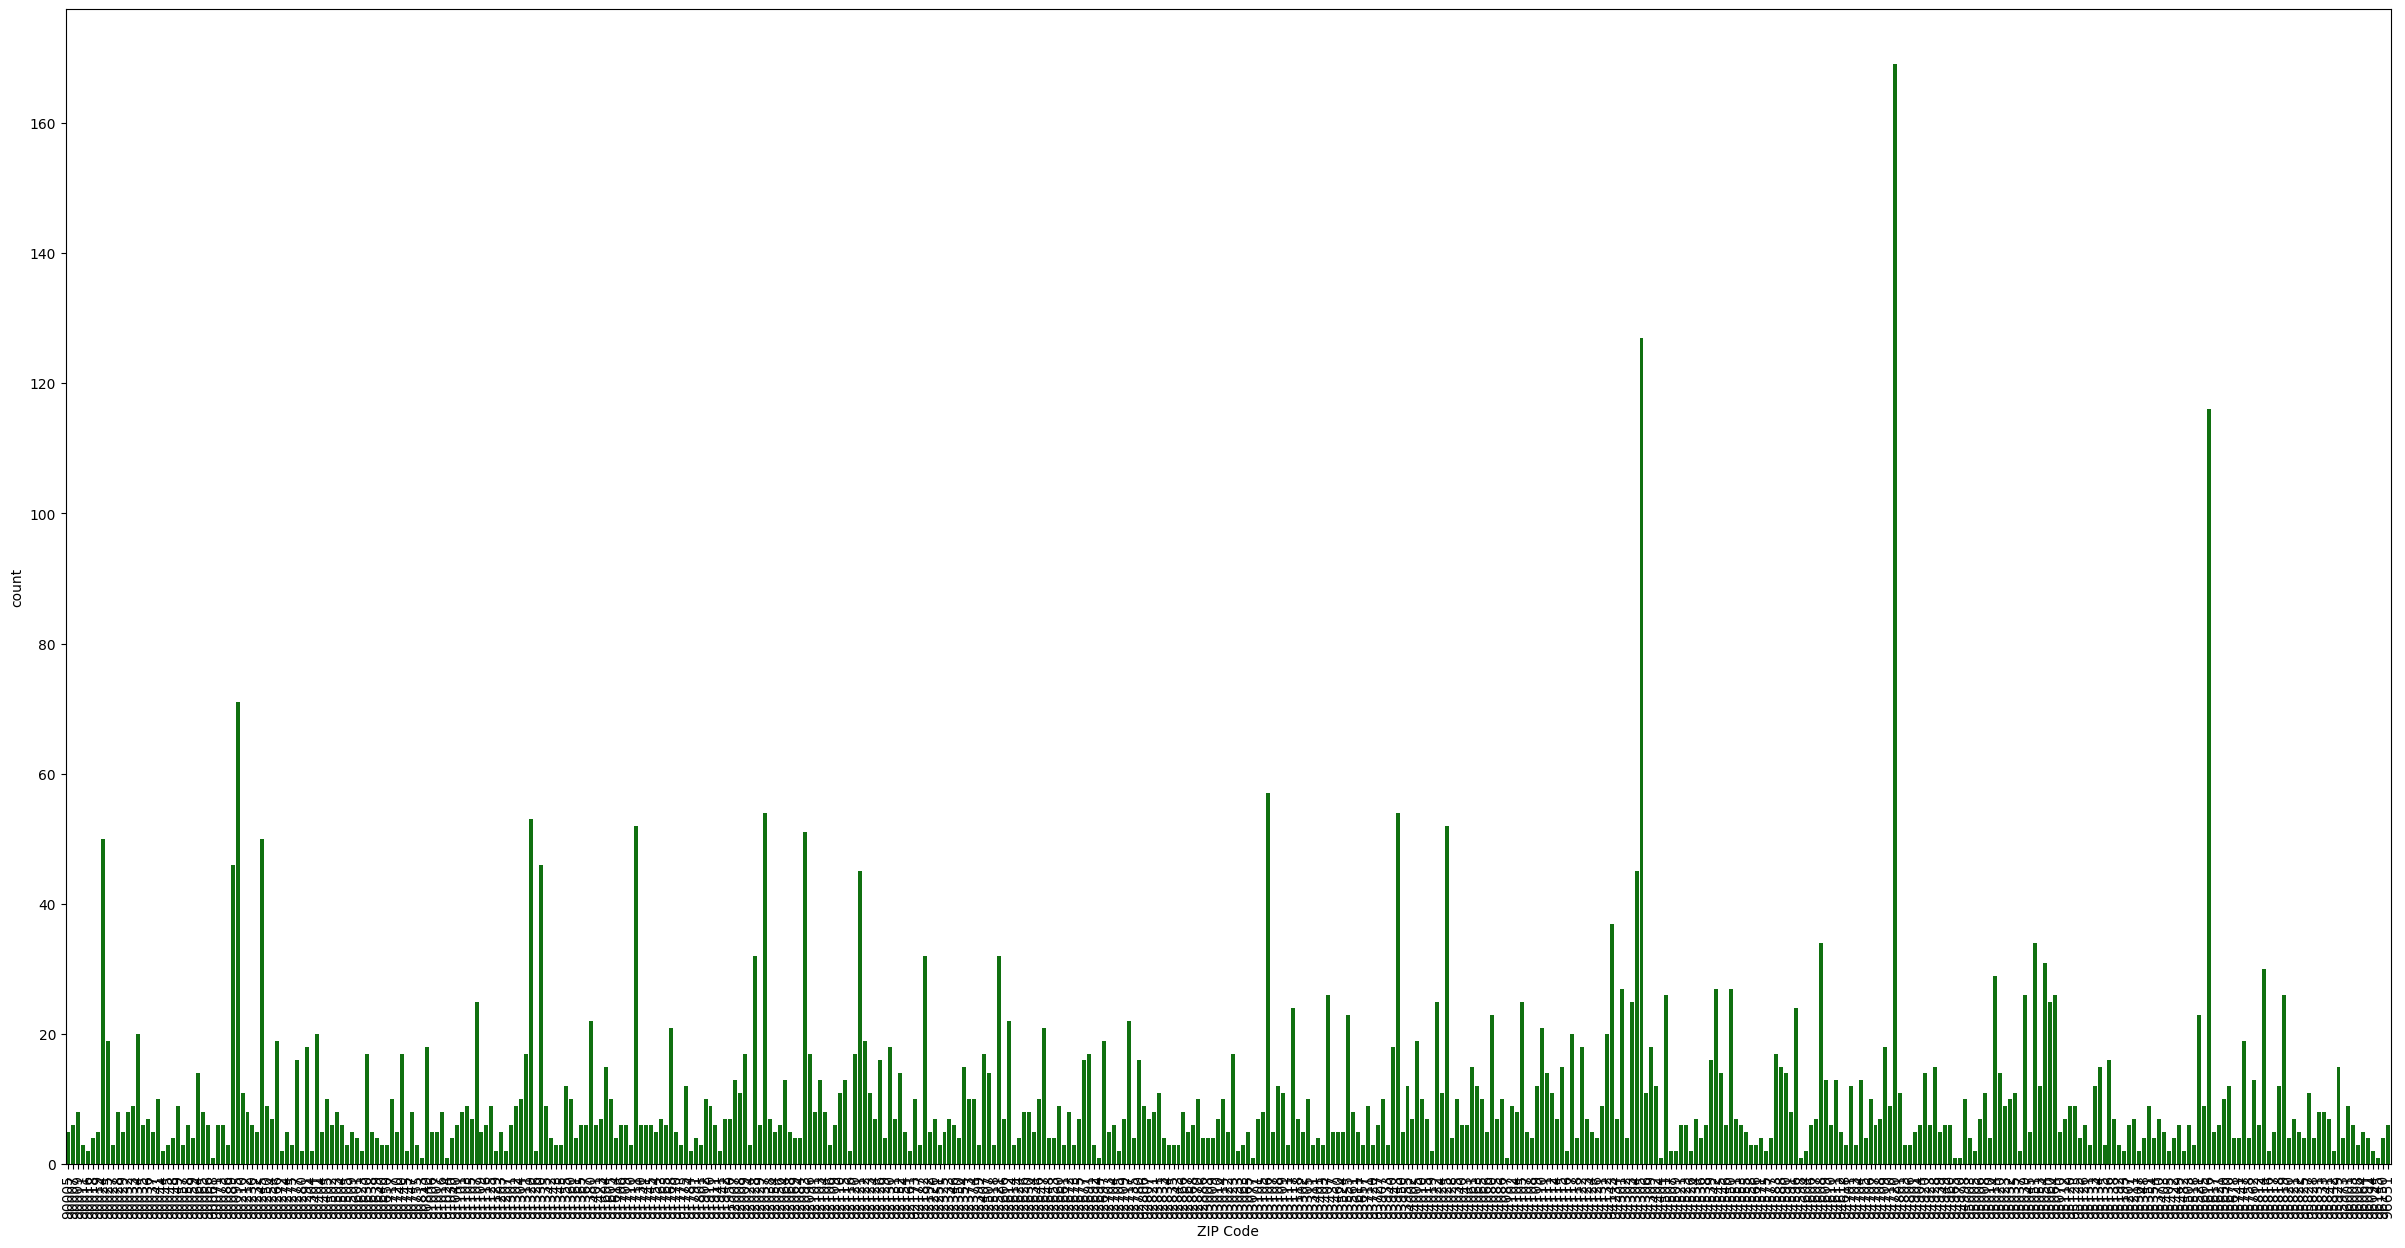

In [21]:
#plotting the zipcode attribute since it wasn't super visible
plt.figure(figsize=(30,15))
sns.countplot(x='ZIPCode', data=df, color='green')
plt.xlabel('ZIP Code')
plt.xticks(rotation=90)
plt.show()

In [22]:
#the graph is still hard tp view so i'll make a df
df['ZIPCode'].value_counts()

,count
ZIPCode,
94720,169
94305,127
95616,116
90095,71
93106,57
...,...
93077,1
94965,1
94970,1


The most popular ZIP code is 94720, appearing 169 times in. There are several ZIP codes that appear only once.

In [23]:
#it will be helful to see the value counts of each feature now that we have a visual idea of the distributions
for col in df.columns:
  print(df[col].value_counts())
  print('')

ID
5000    1
1       1
2       1
3       1
4       1
       ..
13      1
12      1
11      1
10      1
9       1
Name: count, Length: 5000, dtype: int64

Age
35    151
43    149
52    145
58    143
54    143
50    138
41    136
30    136
56    135
34    134
39    133
57    132
59    132
51    129
60    127
46    127
45    127
42    126
31    125
55    125
40    125
29    123
62    123
61    122
44    121
32    120
33    120
48    118
49    115
38    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
26     78
64     78
25     53
24     28
66     24
67     12
23     12
Name: count, dtype: int64

Experience
32    154
20    148
9     147
5     146
23    144
35    143
25    142
28    138
18    137
19    135
26    134
3     133
24    131
16    127
14    127
30    126
34    125
17    125
27    125
22    124
29    124
7     121
6     119
8     119
15    119
10    118
13    117
33    117
11    116
37    116
36    114
4     113
21    113
1     107
31    104
12  

###Bivariate Analysis

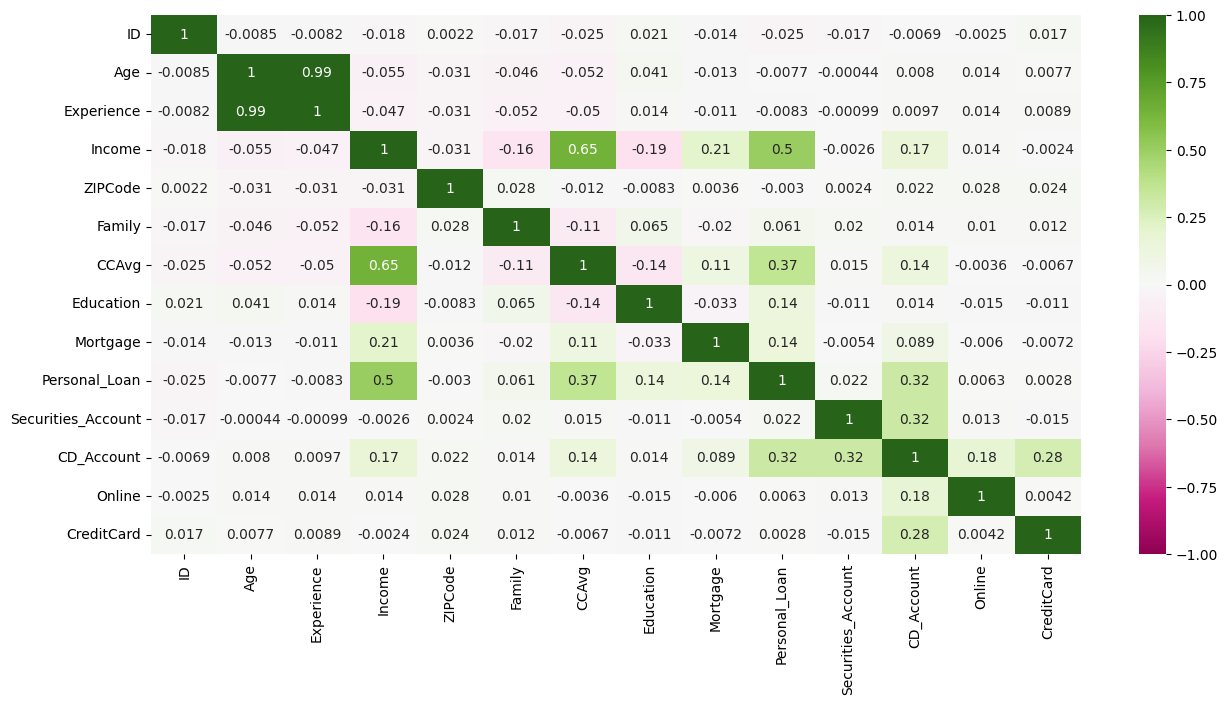

In [24]:
#I'll create a heatmap to show the correlation between all my variables
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap="PiYG")
plt.show()

The heat map makes it visually obvious that most features aren't really correlated.

Some correlations do exist, however:
- There is an **incredibly strong positive** correlation between **Age and Experience** (0.99).
- There is a **moderate positive** correlation between **CC Avg and Income** (0.65).
- There is a **moderate positive** correlation between **Personal Loan and Income** (0.5).
- There is a **moderate positive** correlation between **Personal Loan and CC Avg** (0.37).
- There is a **moderate positive** correlation between **Personal Loan and CD Account** (0.32).
- There is a **moderate positive** correlation between **CD Account and Securities Account** (0.32).

- Age and Education both have a (weak) positive correlation with Personal Loan.


I want to more closely examine the relationships that the heatmap above highlighted.

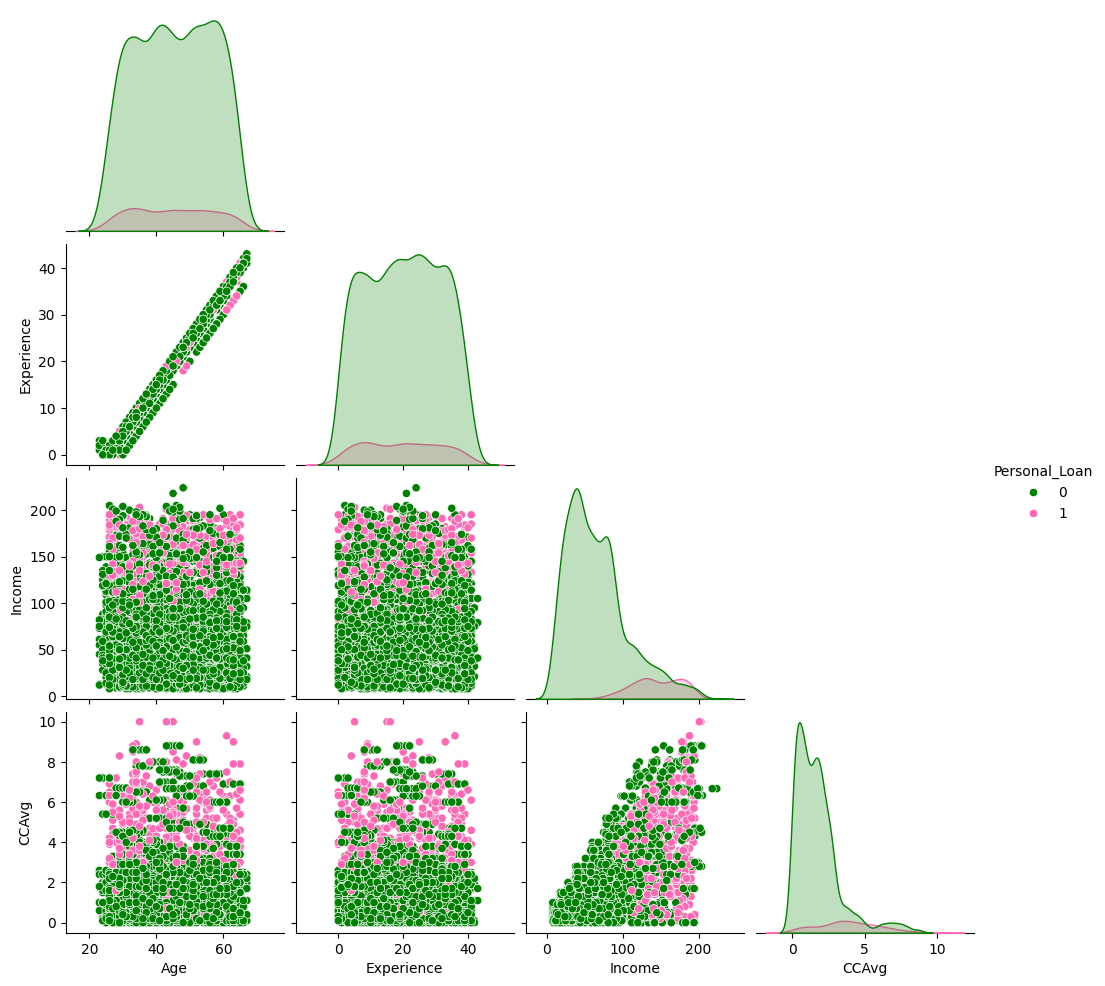

In [25]:
#first let's plot the numerical features of interest.
#note that CC Account and Securities Account are categorical, so will not be included in the pairplot
custom_palette = {0: "green", 1: "hotpink"}


selected_features = ["Age", "Experience", "Income", "CCAvg"]
sns.pairplot(df, vars=selected_features, hue="Personal_Loan", corner=True, palette=custom_palette)
plt.show()

* Age:
  * it seems that customers of all ages have personal loans.
* Experience:
  * Customers of any number of years of experience have personal loans.
* Income:
  * The higher the Income, the more likely a customer will have a personal loan with the bank.
* CCAvg:
  * People with higher CCAvg's are more likely to have a personal loan with the bank.

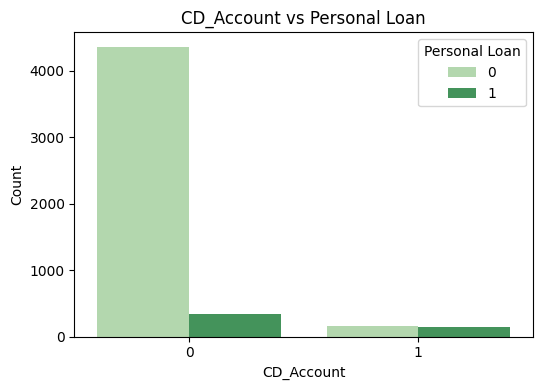

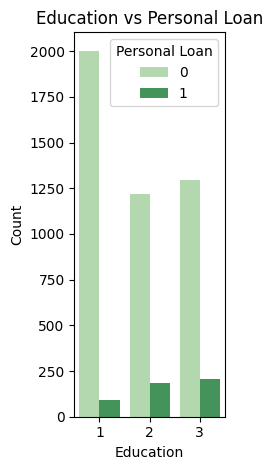

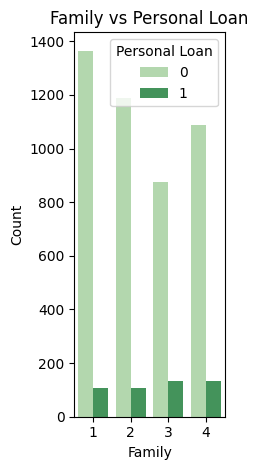

In [26]:
#now i'll create a countplot to show the correlation of the binary features with personal loan
cat_features = ["CD_Account", "Education", "Family"]
n_cols = len(cat_features)
plt.figure(figsize=(5*n_cols, 4))
for i, feature in enumerate(cat_features):
  plt.subplot(1, n_cols, i+1)
  sns.countplot(x=feature, hue="Personal_Loan", data=df, palette="Greens")
  plt.title(f"{feature} vs Personal Loan")
  plt.xlabel(feature)
  plt.ylabel("Count")
  plt.legend(title="Personal Loan")
  plt.tight_layout()
  plt.show()

It's visually obvious here that very few customers have a personal loan with the bank.

* Among those customers with a CD account, half also have a personal loan.
  * **Those with a CD account are more likely to take a personal loan.**

* Each experience level has more and more customers who have taken out a loan than the last.
  * **As a customer's education level increases, their likeliness to take a loan also increases.**
* The ratio of customers with a family size of 3 with and without a loan is a little bit more promising than the other family sizes.
  * **Customers with a family size of 3 are most likely to take a loan.**

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable
patterns or outliers in the distribution?
    * Mortgage is strongly right-skewed with many outliers. Most of these outliers come from those who don't pay mortgage at all (there exist quite a few customers of this disposition).

2. How many customers have credit cards?
    * 4894 customers have credit cards. 3424 customers have credit cards from All Life. 1470 customers have credit cards from other banks.
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
    * The attributes Income, CCAvg, and CD_Account have a strong correlation with Personal_Loan.
4. How does a customer's interest in purchasing a loan vary with their age?
    * It seems that customers of all ages have loans with the bank.
5. How does a customer's interest in purchasing a loan vary with their education?
    * It seems that the higher a customer's education level, the more likely they are to purchase a loan. Advanced/Professional education customers have purchased the most loans.

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [27]:
#i'll double check for missing values in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIPCode             5000 non-null   category
 5   Family              5000 non-null   int64   
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   category
 8   Mortgage            5000 non-null   int64   
 9   Personal_Loan       5000 non-null   category
 10  Securities_Account  5000 non-null   category
 11  CD_Account          5000 non-null   category
 12  Online              5000 non-null   category
 13  CreditCard          5000 non-null   category
dtypes: category(7), float64(1), int64(6)
memory usage: 333.2 KB


Once again, there are no null values.

In [28]:
#now i'll check for outliers in my data

#finding first and third quartiles of the data
Q1 = df.select_dtypes(include=[np.number]).quantile(0.25)
Q3 = df.select_dtypes(include=[np.number]).quantile(0.75)

#finding the IQR of the data
IQR = Q3 - Q1

#finding the upper and lower bounds of the data, outside of which are outliers
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

In [29]:
#number of outliers
((df.select_dtypes(include=["number"]) < lower_bound) | (df.select_dtypes(include=["number"]) > upper_bound)).sum()

,0
ID,0
Age,0
Experience,0
Income,96
Family,0
CCAvg,324
Mortgage,291


The outliers in the CCAvg and Mortgage columns can likely be explained by customers with no mortgage and no credit card spending. This is normal, so I will not be treating the outliers.

###Data Preparation for Modelling

I want to drop the ID column as it offers no insight.

In [30]:
#dropping the ID column in a new dataframe
df_new = df.drop('ID', axis=1)

I'll need to create dummy variables for the ZIPCode, Education, and Family columns.
* Before I do this however, I will need to account for the fact that the ZIPCode column has many unique enteries, each of which will become a new feature in my dataframe when I get dummies. I want to retain crucial regional information while saving space in my feature space.
  * To do this, I'll just convert ZIPCodes to strings and use the first 3 numbers in any ZIP code.

In [34]:
#convert ZIP to string and slice first 3 digits
df_new["ZIPGroup"] = df_new["ZIPCode"].astype(str).str[:3]

print(df_new)

      Age  Experience  Income ZIPCode  Family  CCAvg Education  Mortgage  \
0      25           1      49   91107       4    1.6         1         0   
1      45          19      34   90089       3    1.5         1         0   
2      39          15      11   94720       1    1.0         1         0   
3      35           9     100   94112       1    2.7         2         0   
4      35           8      45   91330       4    1.0         2         0   
...   ...         ...     ...     ...     ...    ...       ...       ...   
4995   29           3      40   92697       1    1.9         3         0   
4996   30           4      15   92037       4    0.4         1        85   
4997   63          39      24   93023       2    0.3         3         0   
4998   65          40      49   90034       3    0.5         2         0   
4999   28           4      83   92612       3    0.8         1         0   

     Personal_Loan Securities_Account CD_Account Online CreditCard ZIPGroup  
0        

Now there exists the column ZIPCode and the column ZIPGroup in my dataset. Let's compare the value counts.

In [41]:
df_new['ZIPCode'].value_counts().shape[0]

467

In [40]:
df_new['ZIPGroup'].value_counts().shape[0]

57

Previously we had 467 unique ZIPCodes, which would have made for 466-467 new columns in our model building dataset. Now we only have 57. This is a huge improvement.

In [42]:
#i'll drop the ZIPCode column
df_new = df_new.drop('ZIPCode', axis=1)

#and rename the ZIPGroup column to ZIPCode
df_new = df_new.rename(columns={'ZIPGroup': 'ZIPCode'})

In [43]:
#let's check that that worked
df_new.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,ZIPCode
0,25,1,49,4,1.6,1,0,0,1,0,0,0,911
1,45,19,34,3,1.5,1,0,0,1,0,0,0,900
2,39,15,11,1,1.0,1,0,0,0,0,0,0,947
3,35,9,100,1,2.7,2,0,0,0,0,0,0,941
4,35,8,45,4,1.0,2,0,0,0,0,0,1,913


Now I have retained valueable regional information while saving room in the feature space.

####Creating Dummy Variables

In [44]:
df_new = pd.get_dummies(df_new, columns=['ZIPCode', 'Education', 'Family'], drop_first=True)

In [45]:
df_new.head()

,Age,Experience,Income,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,...,ZIPCode_958,ZIPCode_959,ZIPCode_960,ZIPCode_961,ZIPCode_966,Education_2,Education_3,Family_2,Family_3,Family_4
0,25,1,49,1.6,0,0,1,0,0,0,...,False,False,False,False,False,False,False,False,False,True
1,45,19,34,1.5,0,0,1,0,0,0,...,False,False,False,False,False,False,False,False,True,False
2,39,15,11,1.0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,35,9,100,2.7,0,0,0,0,0,0,...,False,False,False,False,False,True,False,False,False,False
4,35,8,45,1.0,0,0,0,0,0,1,...,False,False,False,False,False,True,False,False,False,True


Many new columns have been created, the dataframe now has 71 columns.

There is a problem though:
* There are boolean values in my dataset now. I'll need to fix this.

---



In [47]:
for col in df_new.columns:
  if df_new[col].dtype == 'bool':
    df_new[col] = df_new[col].astype(int)

In [49]:
df_new.head()

,Age,Experience,Income,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,...,ZIPCode_958,ZIPCode_959,ZIPCode_960,ZIPCode_961,ZIPCode_966,Education_2,Education_3,Family_2,Family_3,Family_4
0,25,1,49,1.6,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,45,19,34,1.5,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,39,15,11,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,35,9,100,2.7,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,35,8,45,1.0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1


In [50]:
#double checking dtypes
df_new.dtypes.value_counts()

,count
int64,65
category,5
float64,1


There seem to be 5 categorical columns, 'll need to fix this.

In [53]:
#first i need to check what columns are categorical
df_new.select_dtypes(include=['category']).columns

#then i'll convert them to int
for col in df_new.select_dtypes(include=['category']).columns:
  df_new[col] = df_new[col].astype(int)

In [54]:
df_new.dtypes.value_counts()

,count
int64,70
float64,1


Now that there aren't any object dtypes in the dataframe, I'm ready to build models.

## Model Building

I will be building decision tree models to help answer the company's question of which customer demographic to target.

Decision trees can segment data into clusters by splitting it into groups. My goal is to find some cluster of customers who have all gotten a personal loan with the bank and then see what other features make this most likely.

####Splitting Data

In [55]:
X = df_new.drop('Personal_Loan',axis=1) #defining the independent variables
y = df_new['Personal_Loan'] #defining the dependent variable

#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [57]:
#let's check the sized of the train and test datasets
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 70)
Shape of test set :  (1500, 70)
Percentage of classes in training set:
Personal_Loan
0    0.905429
1    0.094571
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.900667
1    0.099333
Name: proportion, dtype: float64


At the beginning of this notebook I found that the percentage of customers who
have taken a loan with the bank was 9.37%. This is retained in the train and test sets.

####Before I go ahead and start creating models, I will need a way to check the model performance
* I'll go ahead and create a function that will take the model, predictors, and target as inputs to show me model performance (evauated on important metrics)

In [64]:
#function to evaluate model performance
#i'll use the metrics accuracy, recall, precision, and f1
def tree_performance(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    pred = model.predict(predictors)

    accuracy = accuracy_score(target,pred)
    recall = recall_score(target, pred)
    precision = precision_score(target, pred)
    f1 = f1_score(target, pred)

    df_perf = pd.DataFrame(
        {"Accuracy": accuracy, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

####Next I'll create a function to plot the confusion matrix with the percentages.

In [58]:
def conf_matrix(model, predictors, target):
    """
    to plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(
        cm,
        annot=labels,
        fmt="",
        cmap="PiYG",   # pink-green colormap
        cbar=True,     # keep the color key
        cbar_kws={"label": "count"}  # add label to the key
    )
    plt.ylabel("true label")
    plt.xlabel("predicted label")
    plt.title("confusion matrix (pink-green)")
    plt.show()


####Next, I'll create a function to plot the decision tree visually.

In [59]:
#function to plot tree
def plot_tree(model, predictor):
    feature_names = predictor.columns.to_list()
    plt.figure(figsize=(20, 10))
    out = tree.plot_tree(
        model,
        feature_names=feature_names,
        filled=True,
        fontsize=9,
        node_ids=False,
        class_names=None,
    )

#code to help arrows appear
    for o in out:
        arrow = o.arrow_patch
        if arrow is not None:
            arrow.set_edgecolor("black")
            arrow.set_linewidth(1)
    plt.show()

####Last, I'll create a function to help visualize the top ten most important features.

In [77]:
def feat_importance(model, X):
    # get feature importances from the model
    importance = model.feature_importances_
    feature_names = X.columns

    # put them in a DataFrame for easy sorting
    feat_df = pd.DataFrame({
        "feature": feature_names,
        "importance": importance
    })

    # sort by importance and select top 10
    feat_df = feat_df.sort_values("importance", ascending=False).head(10)

    # plot
    plt.figure(figsize=(10, 6))
    plt.barh(feat_df["feature"], feat_df["importance"], color="green")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.title("Top 10 Feature Importances")
    plt.gca().invert_yaxis()  # so the most important feature is on top
    plt.show()


### Model Evaluation Criterion

I will be evaluating the models based on their recall and F1 scores. Recall is important because it measures how effectively the model identifies positive cases, ensuring that as few positives as possible are missed. However, recall alone does not account for false positives. That is why I will also consider the F1 score, which balances precision and recall into a single number. By using these two metrics together, I can better understand whether a model is only sensitive (high recall) or if it also maintains reliability in its predictions (via F1).

NP = No Pruning

PrP = Pre-Pruning

PP = Post Pruning

### Model Building

###Default Tree (No Pruning)

To avoid bias, I'll balance the class weights using the frequency of the classes in the training set (previously mentioned)

In [61]:
#creating the default tree
NP_model_0 = DecisionTreeClassifier(criterion="gini",random_state = 42, class_weight={0:0.094571, 1:0.905429})

#fitting it to training data
NP_model_0.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.094571, 1: 0.905429}, random_state=42)

####Evaluating NP_model_0

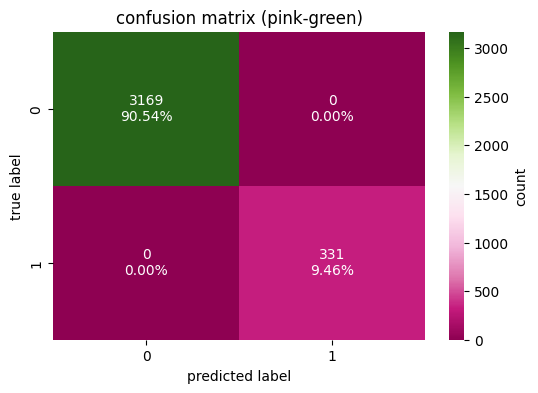

In [62]:
conf_matrix(NP_model_0, X_train, y_train)

In [65]:
tree_performance(NP_model_0, X_train, y_train)

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [66]:
tree_performance(NP_model_0, X_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.974,0.85906,0.876712,0.867797


The model is completely overfit to the training data, as suggested by its perfect score on all the training metrics.

Even still, the model performs pretty well on the test data. The model has an accuracy of 97% meaning it predicts 97% of cases correctly. The high recall of 86% suggests that the model correctly predicted 86% of true positives, and the high precision of 88% suggests that the model has very low false positives.

In [71]:
feature_names = list(X_train.columns)
importances = NP_model_0.feature_importances_
indices = np.argsort(importances)

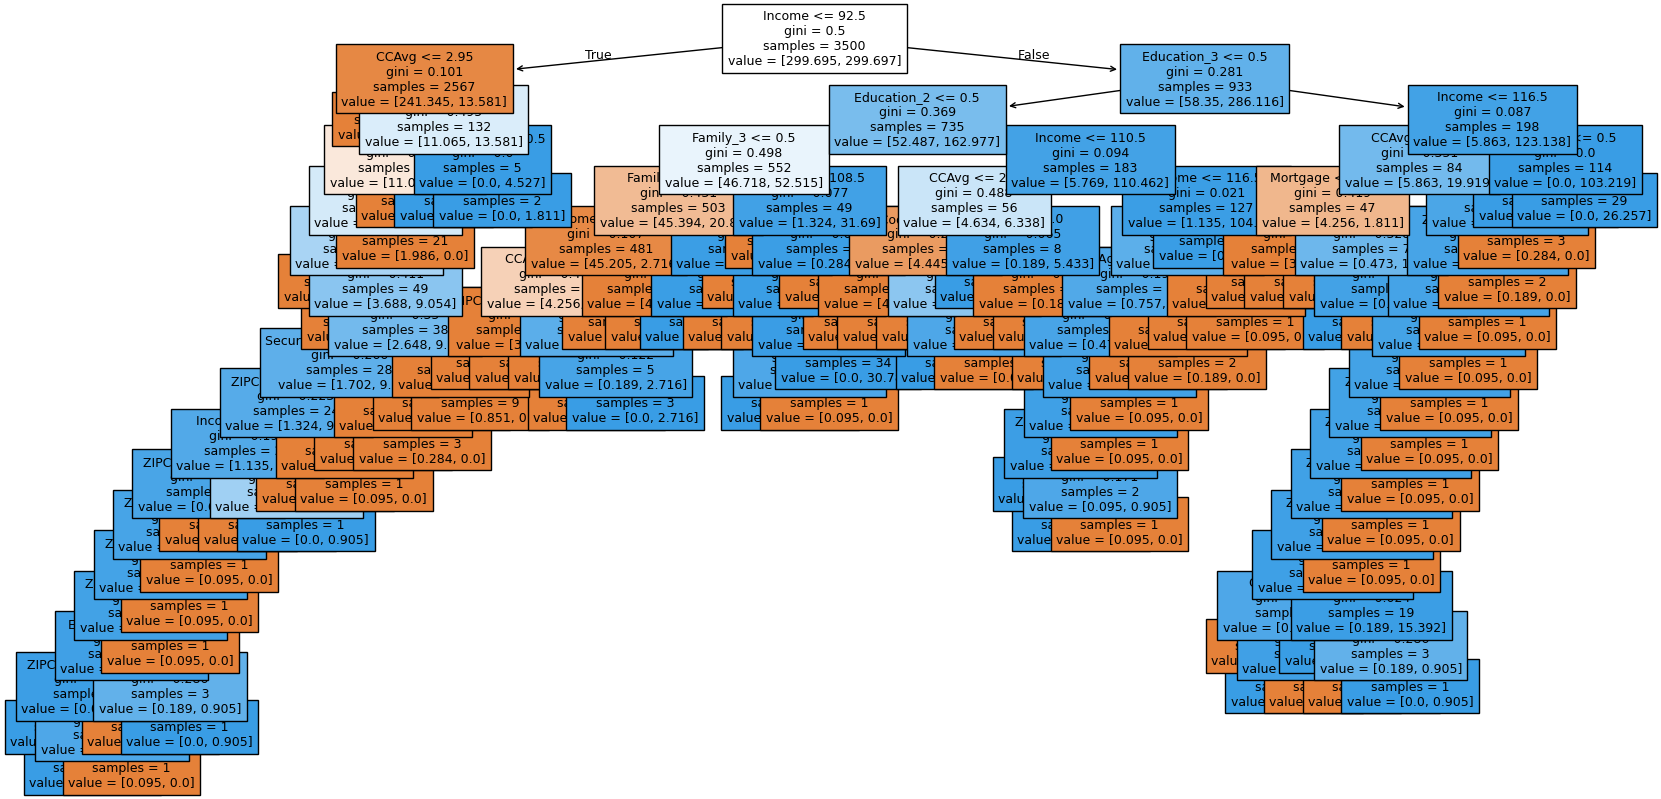

In [67]:
plot_tree(NP_model_0, X_train)

In [72]:
print(tree.export_text(NP_model_0, feature_names=feature_names,show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [230.28, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Mortgage <= 102.50
|   |   |   |   |   |--- Income <= 68.50
|   |   |   |   |   |   |--- weights: [1.42, 0.00] class: 0
|   |   |   |   |   |--- Income >  68.50
|   |   |   |   |   |   |--- CCAvg <= 3.05
|   |   |   |   |   |   |   |--- weights: [1.04, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  3.05
|   |   |   |   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |   |   |   |--- Securities_Account <= 0.50
|   |   |   |   |   |   |   |   |   |--- ZIPCode_920 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- Income <= 84.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |   |   |   |   |   |--- Income >  84.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- 

The default tree, in which I have't tuned any hyperparameters, is pretty complicated and very overfit.

* I will need to pre and post prune to improve the model performance, generalizabilty, and robustness.

For now, I'll visualize the feature importances of this model.

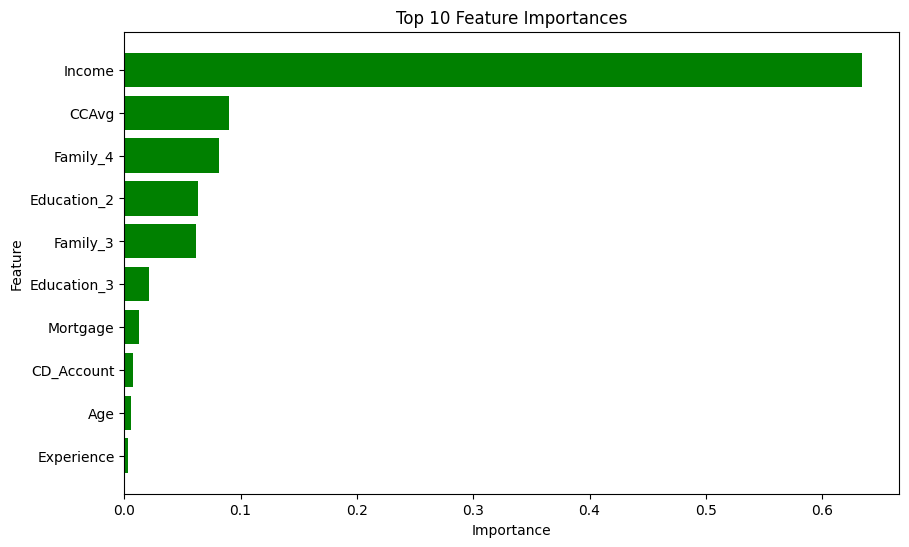

In [78]:
#visualizing 10 most important features
feat_importance(NP_model_0, X_train)

The 5 most important features appear to be income, average monthly credit card spending, and family size of 4, education of 2, and family size of 3 in that order.

## Model Performance Improvement

###Pre-Pruned Tree
I will use GridSearch to create the best model by letting it find optimal hyperparameter values

####PrP_Model_0

In [79]:
#finding max_depth of NP_model_0 to have an idea how to tune our parameters
print(f'''The max depth of NP_model_0 =  {NP_model_0.tree_.max_depth}
Number of nodes ={NP_model_0.tree_.node_count}
Number of leaves = {NP_model_0.tree_.n_leaves}''')

The max depth of NP_model_0 =  18
Number of nodes =161
Number of leaves = 81


In [80]:
#using GridSearch to select the best hyperparameters for an optimal model

#initializing model
PrP_model_0 = DecisionTreeClassifier(random_state=42, class_weight={0: 0.094571, 1: 0.905429})

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 15, 20, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
    'max_leaf_nodes' : [2, 3, 5, 10],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

#using make_scorer to compare parameter combinations
scorer = make_scorer(recall_score)

#GridSearch
grid_obj = GridSearchCV(PrP_model_0, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.094571, 1: 0.905429},
                       criterion='entropy', max_depth=5, max_leaf_nodes=3,
                       min_impurity_decrease=1e-05, random_state=42)

So we went from an unpruned tree with a depth of 18 to a pruned tree with a depth of 5! The new tree also uses a new splitting criterion-instead of gini

In [81]:
#initializing classifier to the best estimator values
PrP_model_0 = grid_obj.best_estimator_

#fitting the model
PrP_model_0.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.094571, 1: 0.905429},
                       criterion='entropy', max_depth=5, max_leaf_nodes=3,
                       min_impurity_decrease=1e-05, random_state=42)

####Model Performance Evaluation for PrP_model_0

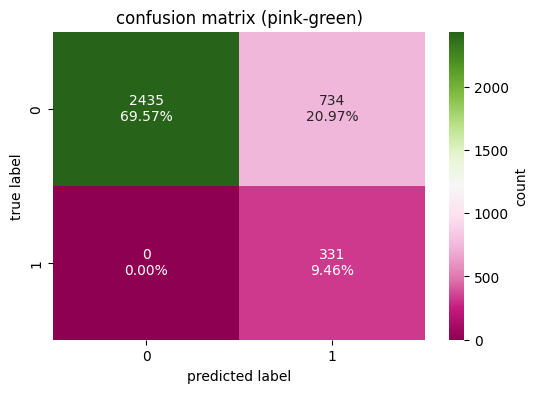

In [82]:
conf_matrix(PrP_model_0, X_train, y_train)

In [83]:
tree_performance(PrP_model_0, X_train, y_train)

,Accuracy,Recall,Precision,F1
0,0.790286,1.0,0.310798,0.474212


In [84]:
tree_performance(PrP_model_0, X_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.779333,1.0,0.310417,0.473768


The model is fairly accurate (79%) and the recall is 100% on both training and testing data, which suggest it perfectly captures positive values. The precision is low, meaning there are quite a few false postive values. The F1 score reflects this imbalance in the recall and precision values.

All that being said, the model is very generalizable given the similarities in train and test scores.

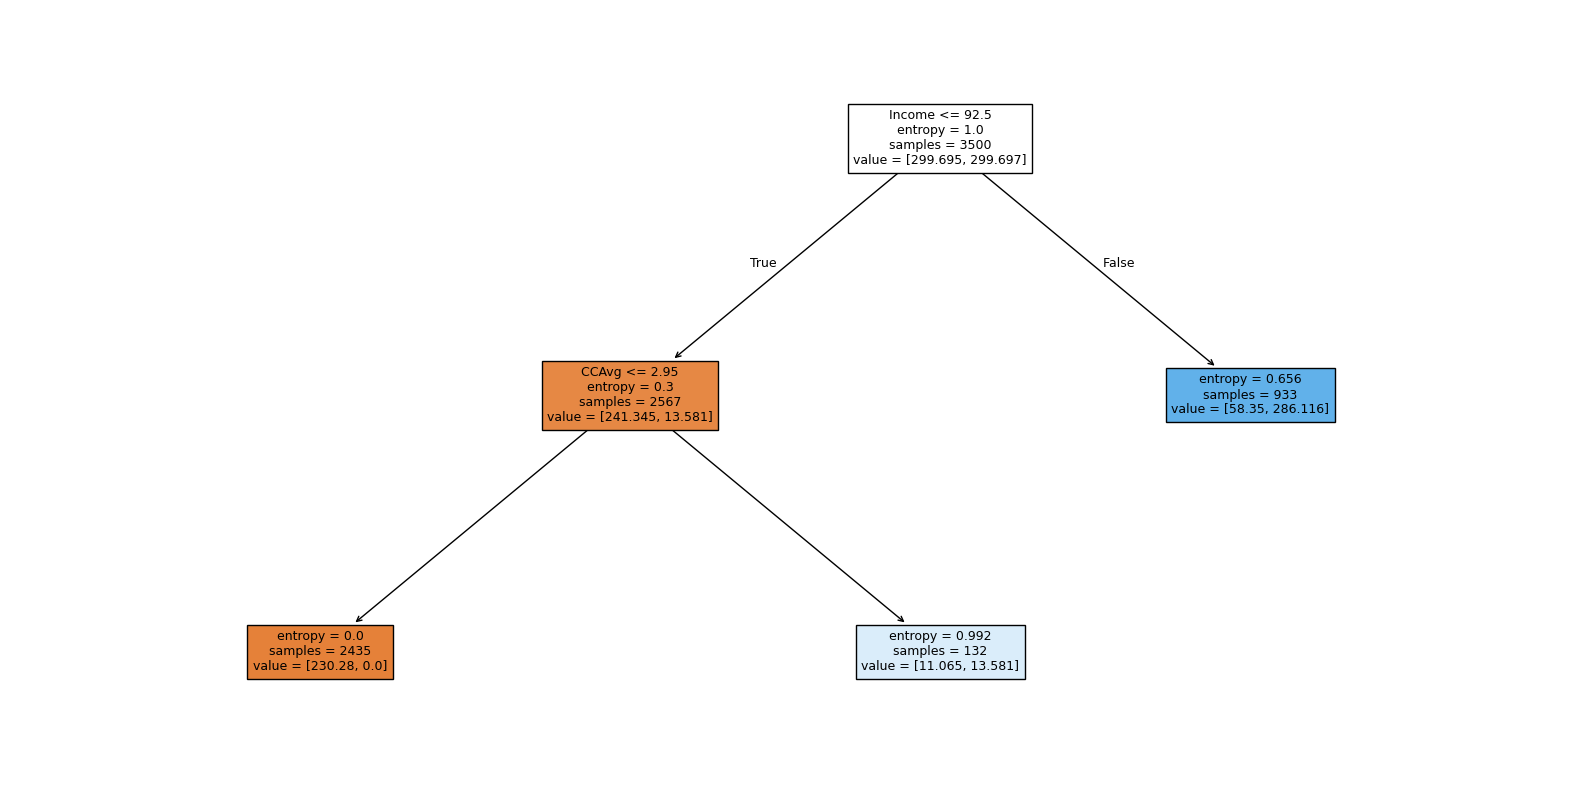

In [85]:
plot_tree(PrP_model_0, X_train)

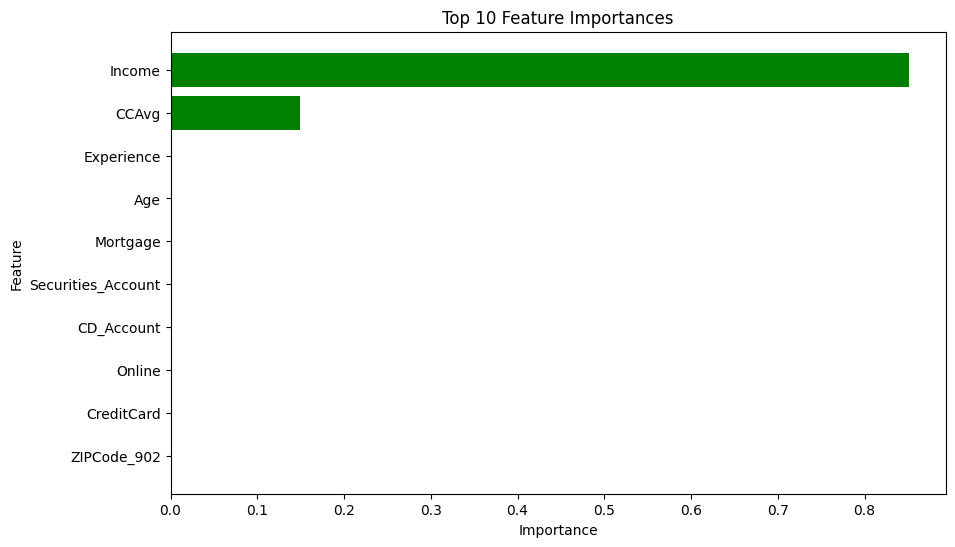

In [87]:
feat_importance(PrP_model_0, X_train)

The only two features of importance to this model are Income and CCAvg, in that order. Income is incredibly importance, almost 5x as much as CCAvg.

####PrP_model_1

This time, I'll only change:
* Max depth (I'll make it 5 as GridSearch suggested)
* Criterion (I'll make it entropy as GridSearch suggested)

I will leave all other parameters the same and see if this helps the model perfomr better.

In [89]:
PrP_model_1 = DecisionTreeClassifier(random_state=1,max_depth=5, criterion='entropy', class_weight={0: 0.094571, 1: 0.905429})
PrP_model_1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.094571, 1: 0.905429},
                       criterion='entropy', max_depth=5, random_state=1)

#### Model Performace Evaluation for PrP_model_1

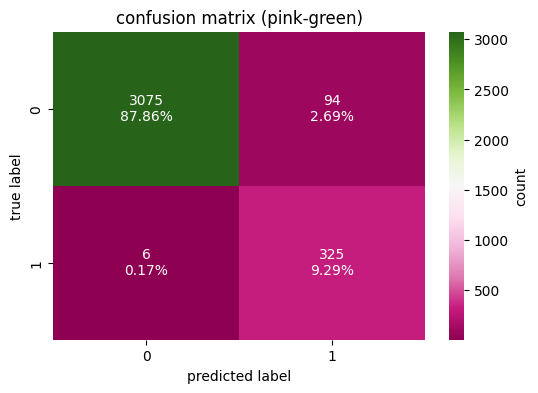

In [90]:
conf_matrix(PrP_model_1, X_train, y_train)

In [91]:
tree_performance(PrP_model_1, X_train, y_train)

,Accuracy,Recall,Precision,F1
0,0.971429,0.981873,0.775656,0.866667


In [92]:
tree_performance(PrP_model_1, X_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.962667,0.932886,0.751351,0.832335


This model is much more accurate than the last.
* Accuracy remains high even in test data (96%)
* The recall dips a bit in the test data, but it's still high which suggests that the model is successful in correctly identifying 93% of positive cases.
* The precision value is also high which means there are few false positive values.

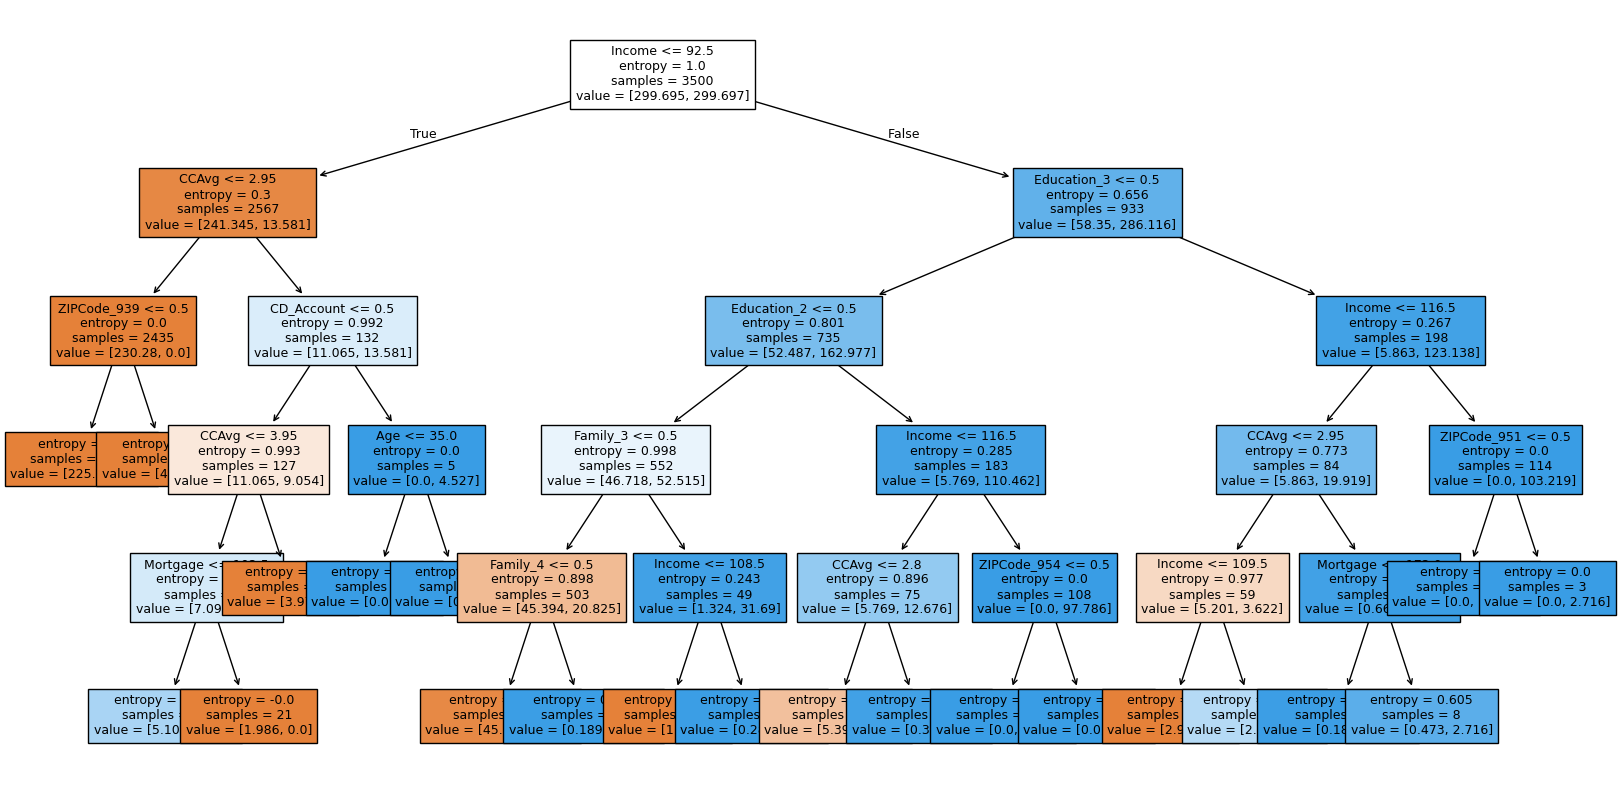

In [93]:
#plotting the tree
plot_tree(PrP_model_1,X_train)

This model is much better fit than the last. The first (and major) split is still on Income, and the second major split is once again on CCAvg, confirming these two feature's cruicial role in segmenting the dataset.

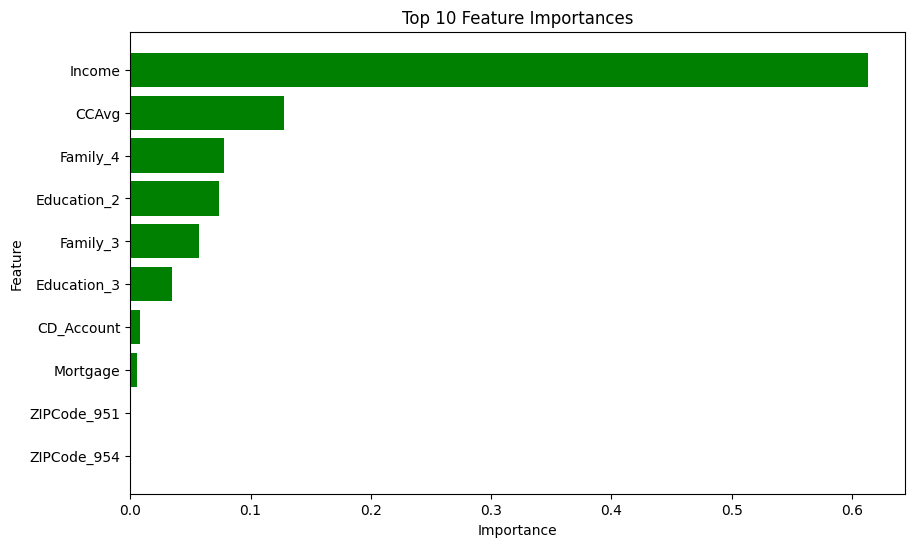

In [94]:
#i'll visualize feature importance now
feat_importance(PrP_model_1, X_train)

The most important features are Income, CCAvg, Family_4, Education_2, Family_3, in that order. Mortgage seems to also play a role now.

Income and CCAvg still have max importance.

#### Comparing Pre-Pruning Model Performance

In [95]:
#comparing PrP_model_0 and PrP_model_1
print("Performance of PrP_model_0")
print(tree_performance(PrP_model_0, X_train, y_train))
print(tree_performance(PrP_model_0, X_test, y_test))
print('')
print("Performance of PrP_model_1")
print(tree_performance(PrP_model_1, X_train, y_train))
print(tree_performance(PrP_model_1, X_test, y_test))

Performance of PrP_model_0
   Accuracy  Recall  Precision        F1
0  0.790286     1.0   0.310798  0.474212
   Accuracy  Recall  Precision        F1
0  0.779333     1.0   0.310417  0.473768

Performance of PrP_model_1
   Accuracy    Recall  Precision        F1
0  0.971429  0.981873   0.775656  0.866667
   Accuracy    Recall  Precision        F1
0  0.962667  0.932886   0.751351  0.832335


* PrP_model_0 achieves perfect recall but suffers from very low precision (0.31), which leads to a modest F1 score. This indicates that while it catches all positives, it generates many false positives and lacks balance.

* PrP_model_1 delivers much higher overall performance, with accuracy above 96%, recall still very strong, and precision substantially better. Its F1 score reflects a healthier balance between recall and precision.

**Overall, PrP_model_1 clearly outperforms PrP_model_0, maintaining high sensitivity while also improving precision, making it more reliable for practical use.**

###Post Pruned Tree

* I will be using cost complexity pruning to control tree size
  * Greater values of ccp_alpha increase the number of nodes pruned

####PP_model_best

In [97]:
PP_model_0 = DecisionTreeClassifier(random_state=42, class_weight={0: 0.094571, 1: 0.905429})

#defining the cost complexity pryning path
path = PP_model_0.cost_complexity_pruning_path(X_train, y_train)

#extracting the ccp_aplhas and impurities from the path
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [98]:
#i'll display the alphas v. the impurities
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,-2.477043e-16
1,1.226182e-18,-2.464782e-16
2,1.541486e-18,-2.449367e-16
3,2.049476e-18,-2.428872e-16
4,2.977871e-18,-2.399093e-16
5,3.082972e-18,-2.368264e-16
6,3.082972e-18,-2.337434e-16
7,5.605404e-18,-2.281380e-16
8,5.605404e-18,-2.225326e-16
9,6.025809e-18,-2.165068e-16


As the alpha increases, the impurities do as well.

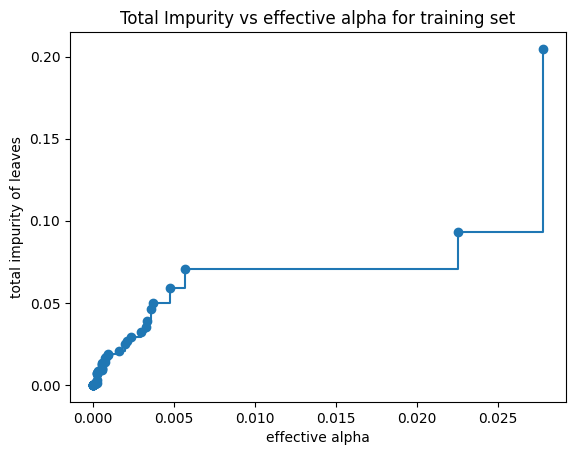

In [99]:
#plotting the alphas vs. the impurities
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

* At low alpha: The tree is large, very complex, and impurities are low (the tree fits tightly to training data).

* As alpha increases: The tree starts pruning—removing branches—so the number of leaves drops, and the total impurity goes up.

* At high alpha: The tree is pruned to just a stump (one node), and impurity is high because all data are lumped together.

There seems to be a nice elbow point at a little over 0.005. THis could potentially be the optimal point that exhibits a good tradeoff between overfitting and underfitting.

Now I'll traverse through many alpha values to see which is the most optimal. I'll store multiple trees with various alpha values in a list called PPed.

In [104]:
PPed = []

for alpha in ccp_alphas:
    PP_model = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha, class_weight={0: 0.094571, 1: 0.905429})

    PP_model.fit(X_train,y_train)
    PPed.append(PP_model)

print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(PPed[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2953794476658218


In [105]:
#because the last elemet in PPed and ccp_alphas represent a tree that has been pruned entirely, i'll remove it
PPed = PPed[:-1]
ccp_alphas = ccp_alphas[:-1]


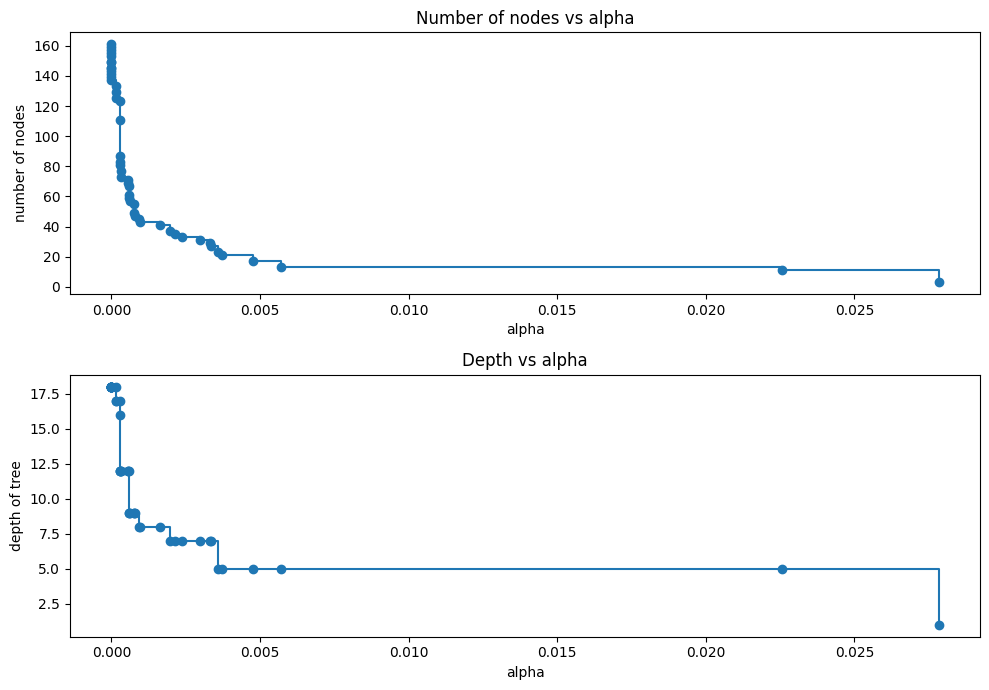

In [108]:
#plotting number of nodes v. alpha
node_counts = [PP_model.tree_.node_count for PP_model in PPed]
depth = [PP_model.tree_.max_depth for PP_model in PPed]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

Once again, just before 0.005 there is a point of interest. This suggests that the alpha value we're looking for is likely less than 0.005.

In [110]:
#derive the recall values for all PP_tress for the train set
recall_train = []
for PP_model in PPed:
    y_pred_train = PP_model.predict(X_train)
    values_train = recall_score(y_train, y_pred_train)
    recall_train.append(values_train)
#derive the recall values for all PP_tress for the test set
recall_test = []
for PP_model in PPed:
    y_pred_test = PP_model.predict(X_test)
    values_test = recall_score(y_test, y_pred_test)
    recall_test.append(values_test)

In [111]:
#calculating the accuracy
train_scores = [PP_model.score(X_train, y_train) for PP_model in PPed]
test_scores = [PP_model.score(X_test, y_test) for PP_model in PPed]

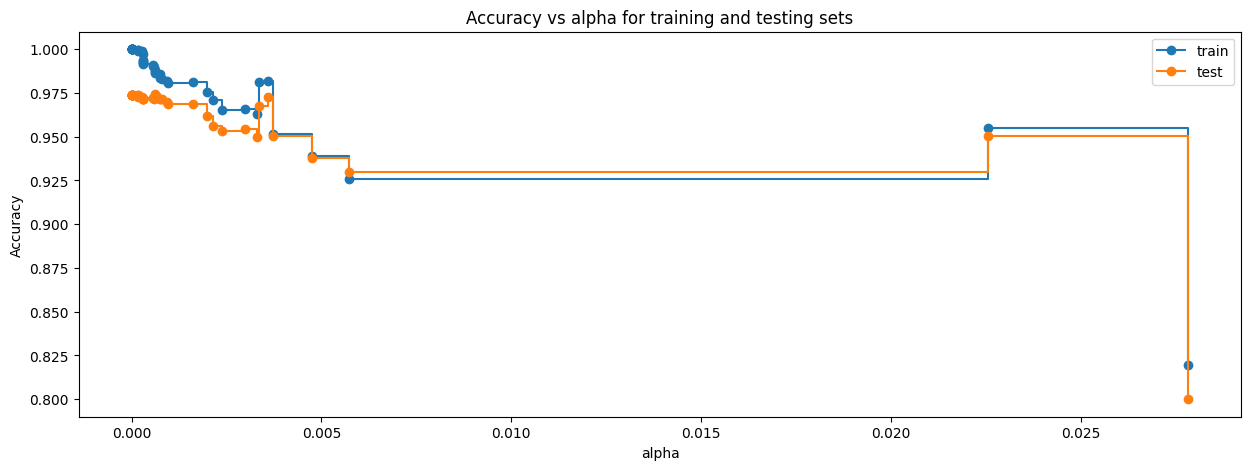

In [112]:
#plotting the accuracy v. alpha
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

The best performance exists, once again, before an alpha value of 0.005. The possible optimal alpha values are all very small, which could potentially mean an overfit tree.

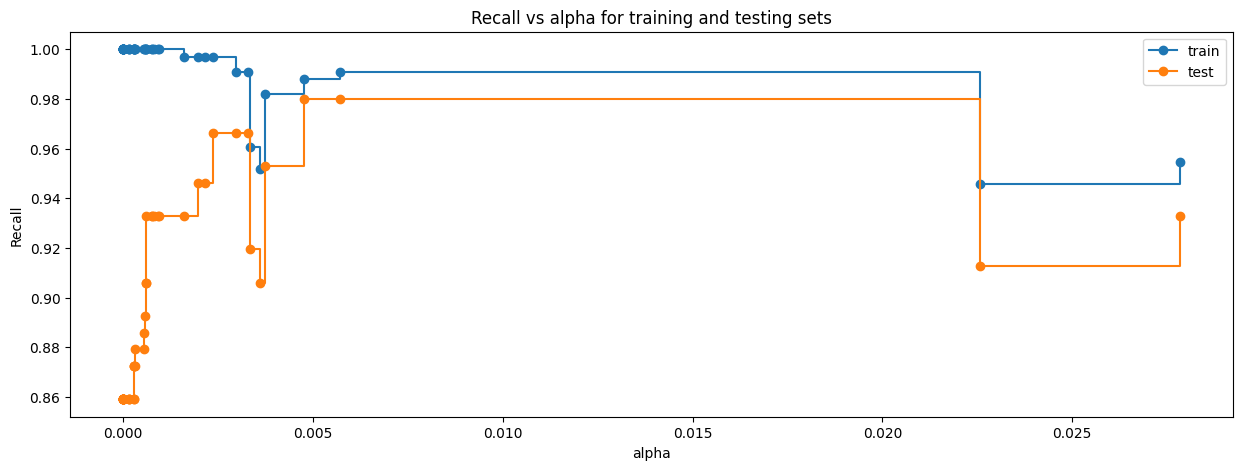

In [113]:
#plotting recall v. alpha
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

The highest recall value seems to be exactly around 0.005 for the test set.

In [116]:
#let us derive the minimum alpha value for test
index_best_model = np.argmax(recall_test)
print(f''' Recall value yielding the best predictibility model: {recall_test[index_best_model]}
Best alpha value: {ccp_alphas[index_best_model]}''')

 Recall value yielding the best predictibility model: 0.9798657718120806
Best alpha value: 0.0047547599759736915


In [117]:
PP_model_best = PPed[index_best_model]
PP_model_best.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0047547599759736915),
                       class_weight={0: 0.094571, 1: 0.905429},
                       random_state=42)

####Performance Evaluation for PP_model_best



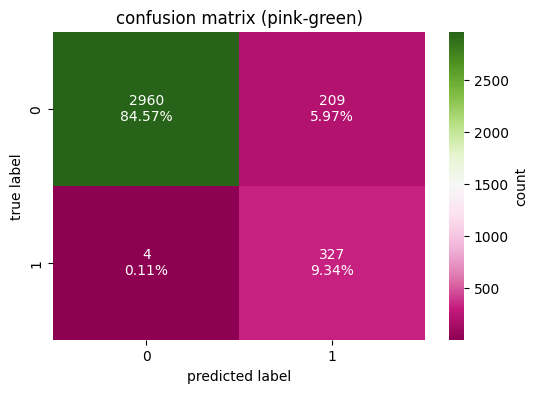

In [119]:
conf_matrix(PP_model_best, X_train, y_train)

In [120]:
tree_performance(PP_model_best, X_train, y_train)

,Accuracy,Recall,Precision,F1
0,0.939143,0.987915,0.610075,0.754325


In [121]:
tree_performance(PP_model_best, X_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.938,0.979866,0.618644,0.758442


This model is very accurate, especially with how every metric is hugely similar between the train and test sets. There is a high recall (98%) which suggests a good grasp of positive values. Precisions is a little lower, which suggests a good amount of false positives are present, but it is still performing well.

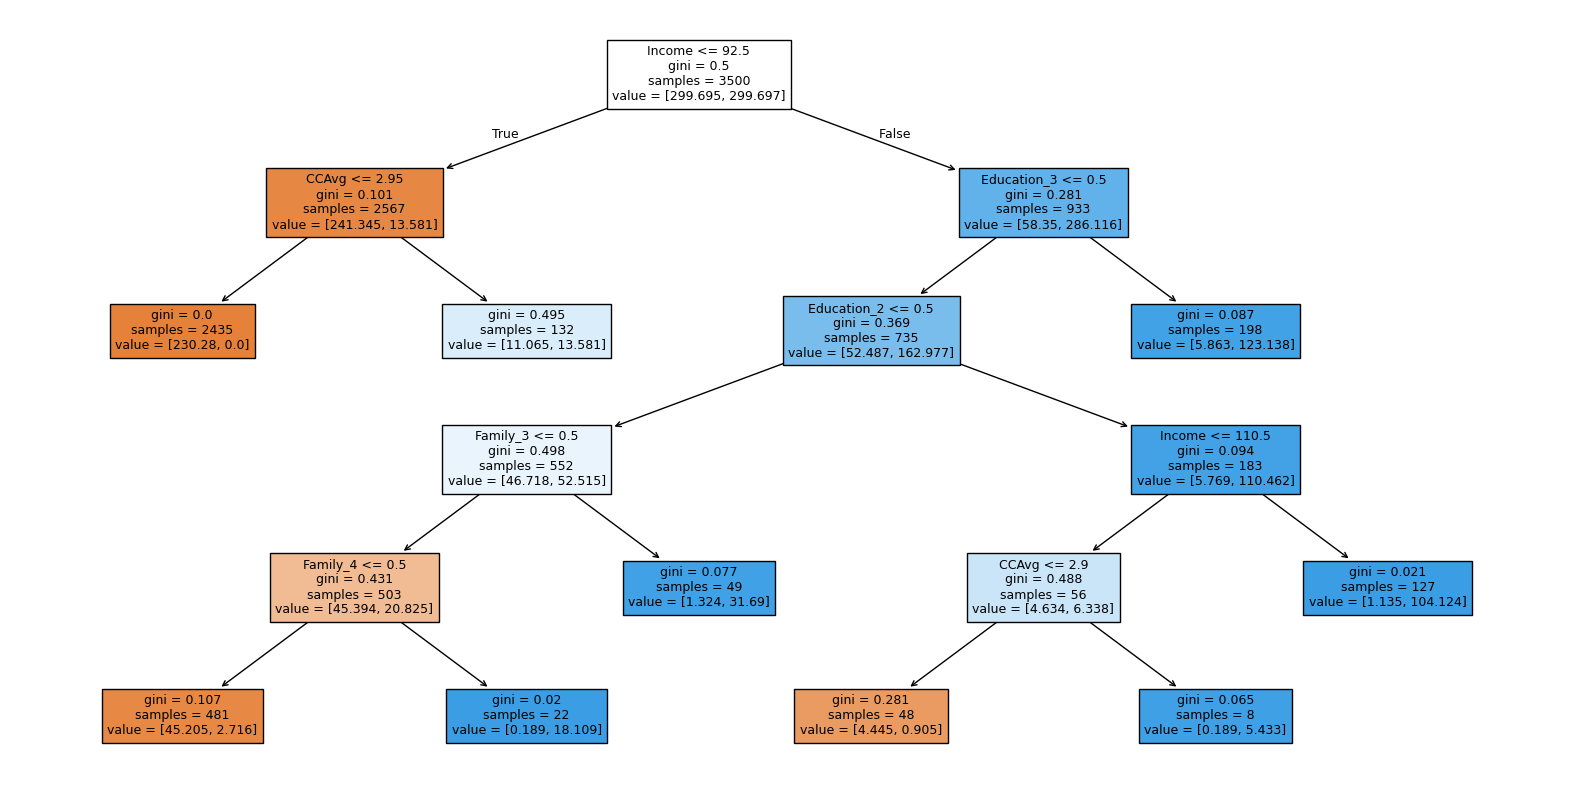

In [122]:
plot_tree(PP_model_best, X_train)

In [125]:
print(tree.export_text(PP_model_best, feature_names=list(X_train.columns),show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [230.28, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [11.06, 13.58] class: 1
|--- Income >  92.50
|   |--- Education_3 <= 0.50
|   |   |--- Education_2 <= 0.50
|   |   |   |--- Family_3 <= 0.50
|   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |--- weights: [45.20, 2.72] class: 0
|   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |--- weights: [0.19, 18.11] class: 1
|   |   |   |--- Family_3 >  0.50
|   |   |   |   |--- weights: [1.32, 31.69] class: 1
|   |   |--- Education_2 >  0.50
|   |   |   |--- Income <= 110.50
|   |   |   |   |--- CCAvg <= 2.90
|   |   |   |   |   |--- weights: [4.44, 0.91] class: 0
|   |   |   |   |--- CCAvg >  2.90
|   |   |   |   |   |--- weights: [0.19, 5.43] class: 1
|   |   |   |--- Income >  110.50
|   |   |   |   |--- weights: [1.13, 104.12] class: 1
|   |--- Education_3 >  0.50
|   |   |--- weights: [5.86, 123.14] class: 1



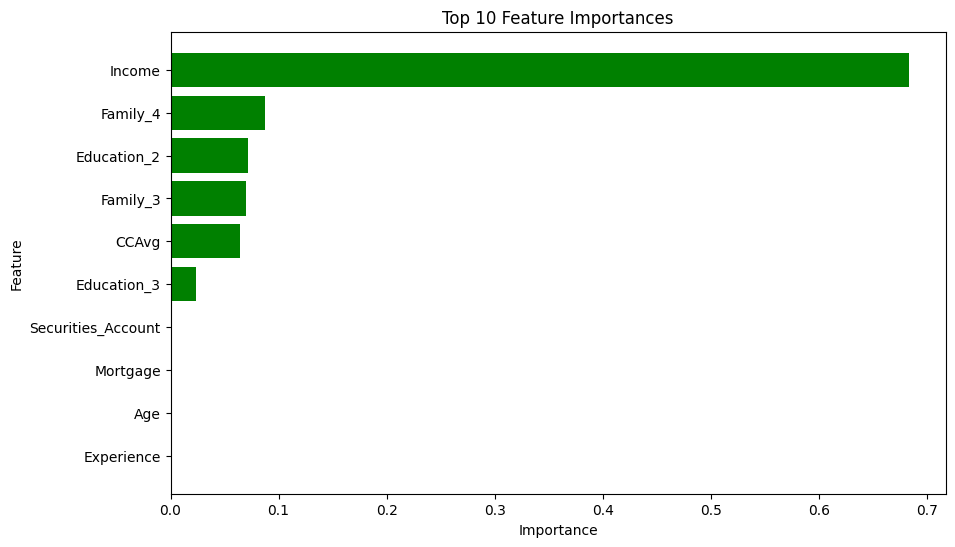

In [123]:
#plotting feature importance
feat_importance(PP_model_best, X_train)

The most important features are Income, Family_4, Education_2, Family_3, and CCAvg.

This is interesting as our pre-pruned trees, and even our default tree, segmented by CCAvg second only to Income. Here, Family_4, Education_2, and Family_3 are all more important than CCAvg.

####PP_model_best_2

I think we can further enhance this model.

i want to observe the path once more and see what alpha values have the highest recall and manually place it into a model.

In [126]:
#creating a data frame including alpha, recall train and recall test
df = pd.DataFrame()
df[['ccp_alphas', 'recall_train', 'recall_test']]=''
df['ccp_alphas']=ccp_alphas
df['recall_train']= recall_train
df['recall_test']=recall_test
df

,ccp_alphas,recall_train,recall_test
0,0.000000e+00,1.000000,0.859060
1,1.226182e-18,1.000000,0.859060
2,1.541486e-18,1.000000,0.859060
3,2.049476e-18,1.000000,0.859060
4,2.977871e-18,1.000000,0.859060
5,3.082972e-18,1.000000,0.859060
6,3.082972e-18,1.000000,0.859060
7,5.605404e-18,1.000000,0.859060
8,5.605404e-18,1.000000,0.859060
9,6.025809e-18,1.000000,0.859060


All of the early models have a training recall of 100%, suggesting overfitting.

But at point 37, the data reads:


> 37	2.375812e-03	0.996979	0.966443

This is good recall for both the train and test sets and seems like a good alpha value since it gives way to a tradeoff between over and underfitting.



In [127]:
#i'll take this alpha and fit it to train and test data
PP_model_best_2 = PPed[37]
PP_model_best_2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=np.float64(0.002375812185755487),
                       class_weight={0: 0.094571, 1: 0.905429},
                       random_state=42)

####Performance Evaluation for PP_model_best_2

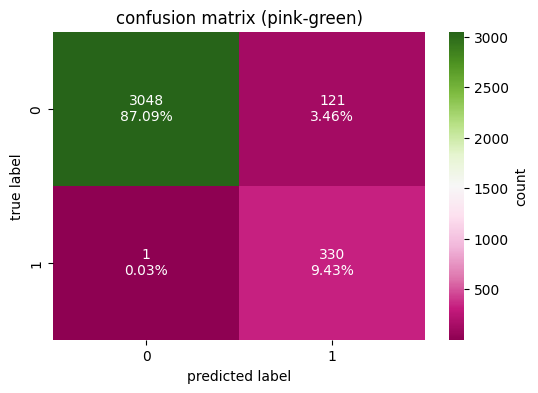

In [128]:
conf_matrix(PP_model_best_2, X_train, y_train)

In [130]:
print(tree_performance(PP_model_best_2, X_train, y_train))
print('')
print(tree_performance(PP_model_best_2, X_test, y_test))

   Accuracy    Recall  Precision       F1
0  0.965143  0.996979   0.731707  0.84399

   Accuracy    Recall  Precision        F1
0  0.953333  0.966443   0.688995  0.804469


Obviously, the recall here will be the same recall I observed in the dataframe.

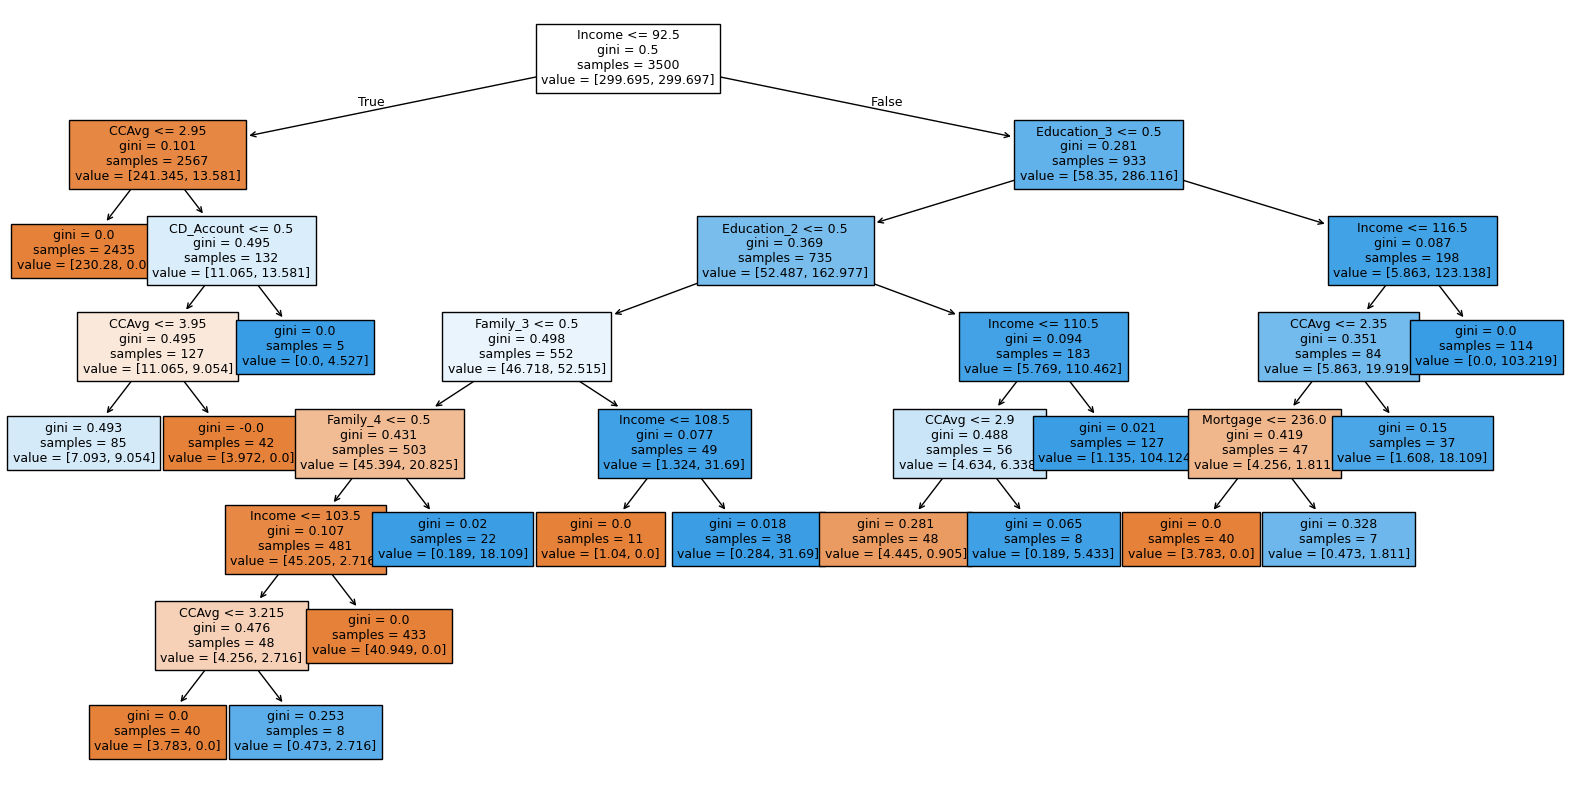

In [131]:
plot_tree(PP_model_best_2, X_train)

In [132]:
print(tree.export_text(PP_model_best_2, feature_names=list(X_train.columns),show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [230.28, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- weights: [7.09, 9.05] class: 1
|   |   |   |--- CCAvg >  3.95
|   |   |   |   |--- weights: [3.97, 0.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [0.00, 4.53] class: 1
|--- Income >  92.50
|   |--- Education_3 <= 0.50
|   |   |--- Education_2 <= 0.50
|   |   |   |--- Family_3 <= 0.50
|   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |--- Income <= 103.50
|   |   |   |   |   |   |--- CCAvg <= 3.21
|   |   |   |   |   |   |   |--- weights: [3.78, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  3.21
|   |   |   |   |   |   |   |--- weights: [0.47, 2.72] class: 1
|   |   |   |   |   |--- Income >  103.50
|   |   |   |   |   |   |--- weights: [40.95, 0.00] class: 0
|   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |--- weights: [0.19, 18.11] class: 1


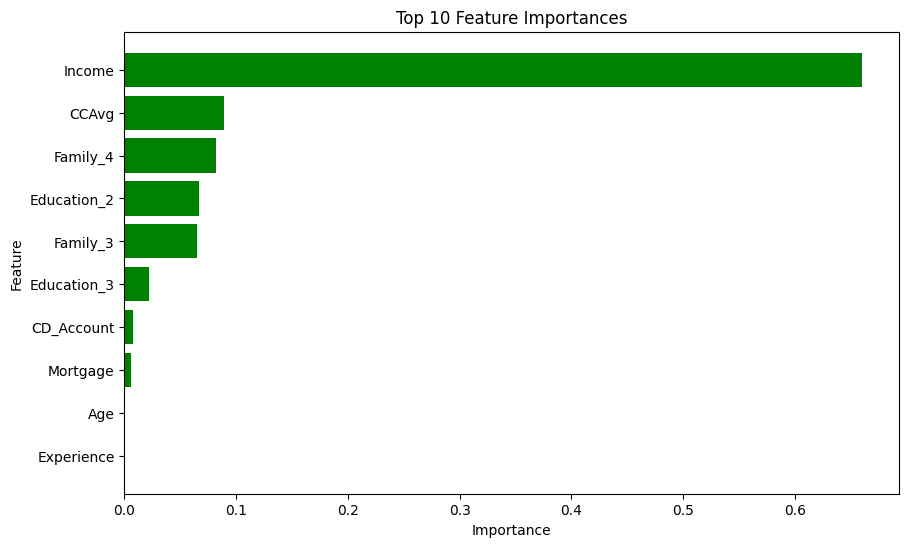

In [133]:
feat_importance(PP_model_best_2, X_train)

Income

This tree is more reminiscent of the default and prepruned trees as the second splitting attribute is CCAvg, this seems promising.

The most important features are Income, CCAvg, Family_4, Education_2, and Family_3 in that order.

It seems like these are consistently the most important features in all the models, although the order varies.

####Comparing Post Pruning Model Performance

Now I will consider both post pruning models I've created and see which one is more optimal.

In [134]:
#comparing
print("Performance of PP_model_best")
print(tree_performance(PP_model_best, X_train, y_train))
print(tree_performance(PP_model_best, X_test, y_test))
print('')
print("Performance of PP_model_best_2")
print(tree_performance(PP_model_best_2, X_train, y_train))
print(tree_performance(PP_model_best_2, X_test, y_test))

Performance of PP_model_best
   Accuracy    Recall  Precision        F1
0  0.939143  0.987915   0.610075  0.754325
   Accuracy    Recall  Precision        F1
0     0.938  0.979866   0.618644  0.758442

Performance of PP_model_best_2
   Accuracy    Recall  Precision       F1
0  0.965143  0.996979   0.731707  0.84399
   Accuracy    Recall  Precision        F1
0  0.953333  0.966443   0.688995  0.804469


The first model (PP_model_best) shows strong recall on both training and testing, but its relatively low precision means it tends to produce more false positives. This leads to a moderate F1 score.

The second model (PP_model_best_2) improves overall performance: recall remains very high (0.997 on training, 0.966 on testing), while precision increases substantially. As a result, the F1 score is also higher.

**In short, PP_model_best_2 strikes a better balance between precision and recall.**

## Model Performance Comparison and Final Model Selection

---



So I'm left with 3 models (after comparing within groups like pre-pruned and post pruned):
* NP_model_0
* PrP_model_1
* PP_model_best_2

I'll compare these models to see which one is most optimal.

In [135]:
#comparing the three models
print("Performance of NP_model_0")
print(tree_performance(NP_model_0, X_train, y_train))
print(tree_performance(NP_model_0, X_test, y_test))

print('')
print("Performance of PrP_model_1")
print(tree_performance(PrP_model_1, X_train, y_train))
print(tree_performance(PrP_model_1, X_test, y_test))

print('')
print("Performance of PP_model_best_2")
print(tree_performance(PP_model_best_2, X_train, y_train))
print(tree_performance(PP_model_best_2, X_test, y_test))

Performance of NP_model_0
   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
   Accuracy   Recall  Precision        F1
0     0.974  0.85906   0.876712  0.867797

Performance of PrP_model_1
   Accuracy    Recall  Precision        F1
0  0.971429  0.981873   0.775656  0.866667
   Accuracy    Recall  Precision        F1
0  0.962667  0.932886   0.751351  0.832335

Performance of PP_model_best_2
   Accuracy    Recall  Precision       F1
0  0.965143  0.996979   0.731707  0.84399
   Accuracy    Recall  Precision        F1
0  0.953333  0.966443   0.688995  0.804469


####**Model Comparison**

**NP_model_0**

* Training: perfect recall (1.0) and F1 (1.0), but on the test set, recall drops to 0.859 while F1 is 0.8678.

* Interpretation: catches most positives on training, but test performance **shows overfitting and lower ability to generalize.**

**PrP_model_1**

* Training: recall 0.9819, F1 0.8667; Testing: recall 0.9329, F1 0.8323.

* Interpretation: maintains **high recall and good F1** on both training and test, showing better generalization than NP_model_0.

**PP_model_best_2**

* Training: recall 0.997, F1 0.844; Testing: recall 0.966, F1 0.804.

* Interpretation: achieves **highest recall** across training and testing, but **F1 is slightly lower due to lower precision** (~0.69 test). This indicates the model is extremely sensitive to positives, but **more false positives occur**.

####PP_model_best_2 maximizes recall, PrP_model_1 maximizes F1 balance.

####**Winner = PrP_model_1**
I chose PrP_model_1 because it offers a strong balance between recall and F1 score on the test set. While other models, like PP_model_best_2, achieve slightly higher recall, their precision is lower, which reduces the overall F1. PrP_model_1 maintains very high recall while also improving precision, resulting in a more reliable and generalizable model for practical use.

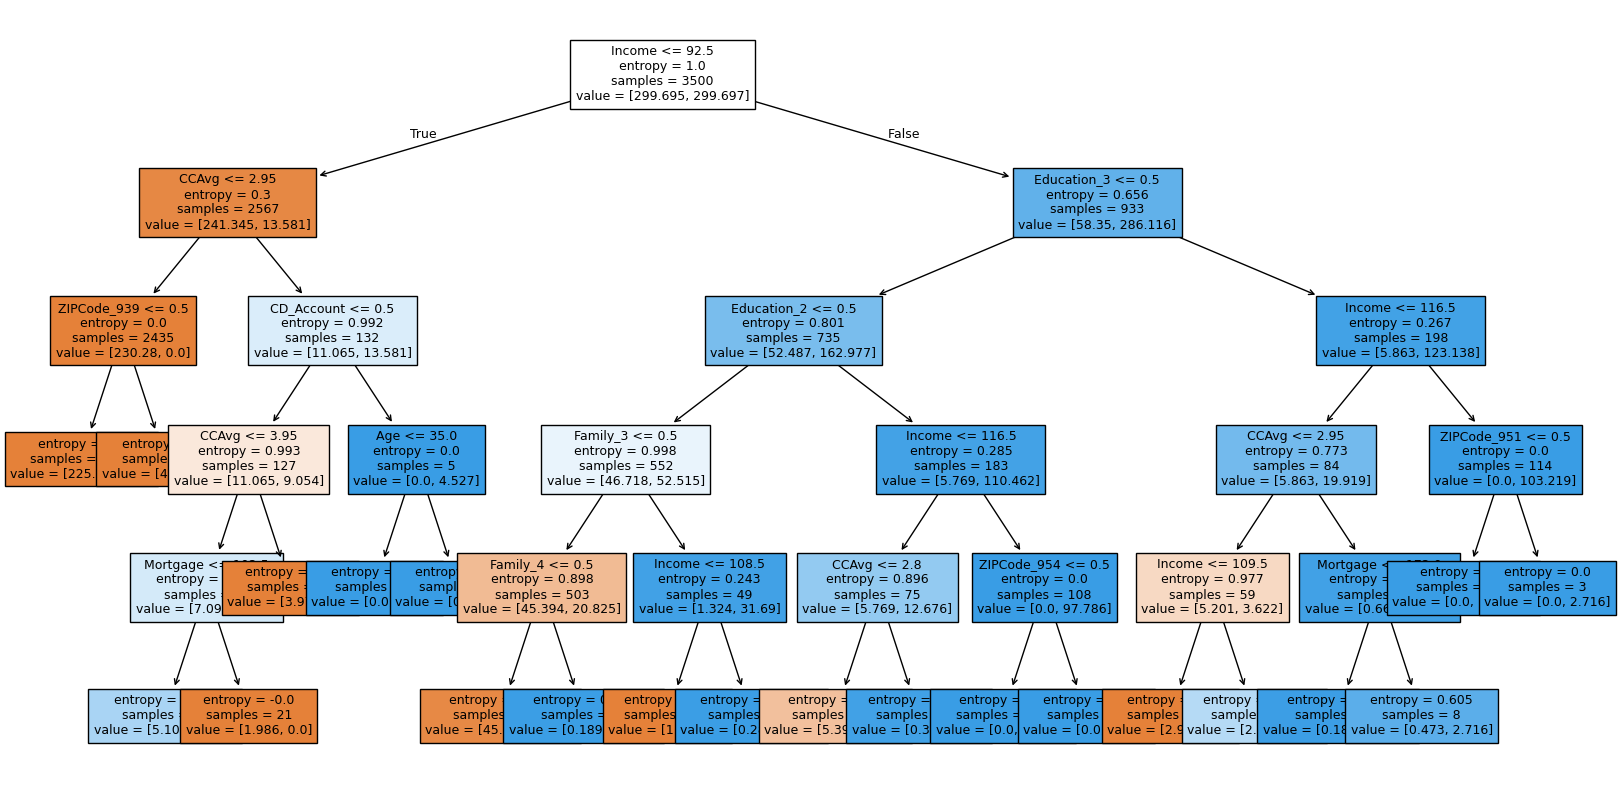

In [136]:
plot_tree(PrP_model_1, X_train)

In [137]:
print(tree.export_text(PrP_model_1, feature_names=list(X_train.columns),show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- ZIPCode_939 <= 0.50
|   |   |   |--- weights: [225.46, 0.00] class: 0
|   |   |--- ZIPCode_939 >  0.50
|   |   |   |--- weights: [4.82, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Mortgage <= 102.50
|   |   |   |   |   |--- weights: [5.11, 9.05] class: 1
|   |   |   |   |--- Mortgage >  102.50
|   |   |   |   |   |--- weights: [1.99, 0.00] class: 0
|   |   |   |--- CCAvg >  3.95
|   |   |   |   |--- weights: [3.97, 0.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- Age <= 35.00
|   |   |   |   |--- weights: [0.00, 0.91] class: 1
|   |   |   |--- Age >  35.00
|   |   |   |   |--- weights: [0.00, 3.62] class: 1
|--- Income >  92.50
|   |--- Education_3 <= 0.50
|   |   |--- Education_2 <= 0.50
|   |   |   |--- Family_3 <= 0.50
|   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |--- weights: [45.20, 2.72] class: 0
|   |   |   |   |--- Fa

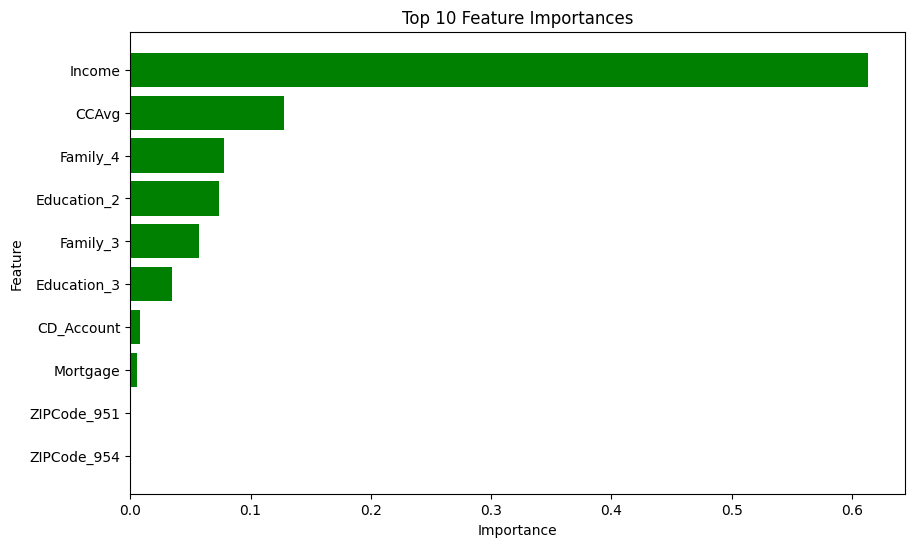

In [138]:
feat_importance(PrP_model_1, X_train)

####Interpreting Decision Rules

* **Income matters a lot**

  * Low-income customers (≤ 92.50k) are mostly predicted not to take the product unless they have high credit card usage (CCAvg > 2.95) and certain account types.

  * High-income customers (> 92.50k) are much more likely to be predicted class 1 (take the product), especially if they have higher education, larger families, higher CCAvg, or certain ZIP codes.

* **Credit behavior is critical**

  * **CCAvg** (average credit card spending) is a strong predictor. Customers with higher spending are more likely to adopt the product.

  * **CD_Account** ownership also influences outcomes, especially for mid-income customers.

* **Demographics help refine the prediction**

  * **Age:** Younger high-spending customers with CD accounts are more likely to adopt.

  * **Family size:** For high-income, educated customers, larger families (Family_4 > 0.50) increase likelihood of adoption.

  * **Education level:** Higher education generally correlates with adoption, but the effect interacts with income and family size.

* **Location matters**

  *Certain ZIP codes (like 954 and 951) appear multiple times, suggesting regional patterns in adoption.

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

### Actionable Insights

1. **Target high-income, high-spending customers first**

    * Customers with income > 92.5k and high CCAvg are most likely to adopt.

2. **Focus on educated customers with larger families**

    * Marketing to high-education, multi-member households increases conversion likelihood.

3. **Leverage CD account holders**

    * For mid-income, high CCAvg customers, owning a CD account significantly increases probability of adoption.

4. **Tailor regional campaigns**

    * ZIPcodes like 951 and 954 show higher adoption rates localized marketing or promotions could improve ROI.

5. **Segment by age for targeted offers**

    * Younger customers with high spending and CD accounts are prime candidates for credit-based products or promotions.

####Business Recommendations

* Prioritize marketing resources toward customers with high income, high CCAvg, higher education, and large families.

* Offer incentives or specialized packages for mid-income, high-spending customers with CD accounts.

* Use ZIP code insights to design regional campaigns, possibly testing targeted promotions in high-adoption regions first.

* Segment messaging by age to appeal to younger customers who are likely to adopt if they have strong credit behavior.

___